In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from hazm import Normalizer
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('salessss.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2306031916.py:1: DtypeWarning: Columns (6,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('salessss.csv')


,link,type,date,address,area,floors_sum,homes_num,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,age,elevator,parking,desc,price,facilities,Dollar,geram18,geram24,address_no_digits,region,longitude,latitude
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90.0,4.0,4.0,3.0,2.0,جنوبی,آجرگری,سرامیک,کاغذ دیواری,فلزی,آبی,7.0,ندارد,دارد,وکالتی,250000000.0,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391.0,438000.0,583900.0,ارمغان,11.0,59.466991,36.347262
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112.0,3.0,7.0,3.0,2.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,های گلاس,آبی,12.0,ندارد,دارد,شش دانگ ملک,695000000.0,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391.0,438000.0,583900.0,هاشمیه,9.0,59.501074,36.307539
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81.0,6.0,4.0,5.0,2.0,-,ترکیبی,سرامیک,گچی,-,-,0.0,دارد,دارد,شش دانگ ملک,370000000.0,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391.0,438000.0,583900.0,حسابی جنوبی,10.0,59.495644,36.349646
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81.0,4.0,8.0,3.0,2.0,شمالی,سیمان سفید,سرامیک,نقاشی,فلزی,آبی,15.0,ندارد,دارد,شش دانگ ملک,450000000.0,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391.0,438000.0,583900.0,کوثر شمالی,9.0,59.510348,36.309638
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175.0,4.0,4.0,2.0,3.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,کلاسیک,گازی,0.0,دارد,دارد,شش دانگ ملک,962500000.0,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391.0,438000.0,583900.0,حسابی شمالی,10.0,59.504458,36.362017


In [4]:
df = df.sort_values(by='date')
df.head()

,link,type,date,address,area,floors_sum,homes_num,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,age,elevator,parking,desc,price,facilities,Dollar,geram18,geram24,address_no_digits,region,longitude,latitude
205735,https://maskanyaban.ir/home/1299/فروش-آپارتمان...,فروش آپارتمان,1394/02/18,مشهد - صیاد شیرازی15,80.0,4.0,5,4.0,1.0,جنوبی,سنگ,سرامیک,نقاشی,ام دی اف,کولر آبی,9.0,False,True,NaN,144000000.0,"پارکینگ, تراس, آیفون تصویری",NaN,NaN,NaN,مشهد - صیاد شیرازی,9.0,NaN,NaN
208596,https://maskanyaban.ir/home/114/فروش-آپارتمان-...,فروش آپارتمان,1395/01/24,مشهد - امامت12,170.0,5.0,5,4.0,3.0,شمالی,سنگ,سرامیک,نقاشی,های گلس,کولر آبی,1.0,True,True,NaN,560000000.0,"آسانسور, پارکینگ, انباری, تراس, آیفون تصویری, ...",3466.0,105680.0,140990.0,مشهد - امامت,11.0,NaN,NaN
243044,https://maskanyaban.ir/home/106/فروش-آپارتمان-...,فروش آپارتمان,1395/01/24,مشهد - پیروزی24 خیابان رهایی9,NaN,3.0,8,2.0,2.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,ام دی اف,کولر آبی,3.0,False,True,NaN,150000000.0,"پارکینگ, انباری, تراس, آیفون تصویری, درب برقی",3466.0,105680.0,140990.0,مشهد - پیروزی خیابان رهایی,9.0,NaN,NaN
263054,https://maskanyaban.ir/home/105/فروش-آپارتمان-...,فروش آپارتمان,1395/01/24,مشهد - هنرستان23,NaN,4.0,9,3.0,3.0,شمالی,سنگ,سرامیک,کاغذ دیواری,ام دی اف,کولر گازی,6.0,True,True,NaN,NaN,"آسانسور, پارکینگ, انباری, تراس, آیفون تصویری, ...",3466.0,105680.0,140990.0,مشهد - هنرستان,9.0,NaN,NaN
232707,https://maskanyaban.ir/home/111/فروش-آپارتمان-...,فروش آپارتمان,1395/01/24,مشهد - دلاوران20 نخل3 زیتون1,NaN,4.0,4,0.0,1.0,شمالی,سنگ,موکت,کاغذ دیواری,فلز,کولر آبی,4.0,False,True,NaN,70000000.0,"پارکینگ, انباری, تراس",3466.0,105680.0,140990.0,مشهد - دلاوران نخل زیتون,9.0,NaN,NaN


In [5]:
df.drop(['type','homes_num','address_no_digits','longitude','latitude'],axis=1,inplace=True)

# forward fill on dollar and gold columns
columns_to_fill = ['Dollar', 'geram18', 'geram24']
df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')

df.replace(['-', "couldn't crawl","c, o, u, l, d, n, ', t, , c, r, a, w, l"], np.nan, inplace=True)
columns_to_fill = ['Dollar', 'geram18', 'geram24']
df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2010279352.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2010279352.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')


In [6]:
def adjust_area(area, group_mean):
    if pd.isna(area):
        return area
    if area <35:
        return group_mean
    if 10000 <= area < 50000:
        return area / 100
    elif area >= 50000:
        return area / 1000
    return area

df['area'] = df.groupby('region')['area'].transform(lambda x: x.apply(lambda area: adjust_area(area, x.mean())))
def adjust_area_price(row, group_mean_area, group_mean_price):
    area = row['area']
    price = row['price']
    
    # اگر area نان باشه، با میانگین پر می‌کنیم
    if pd.isna(area):
        return group_mean_area
    
    # اگر price نان باشه، area رو با میانگین پر می‌کنیم و برمی‌گردونیم
    if pd.isna(price):
        return group_mean_area
        
    # برای مساحت‌های بزرگتر از 300
    if area > 300:
        if pd.isna(price/area):  # چک کردن برای حالتی که تقسیم نتیجه نان بده
            return group_mean_area
        # محاسبه قیمت تقسیم بر مساحت
        price_per_area = price / area
        # مقایسه با میانگین قیمت منطقه
        if price_per_area < group_mean_price:
            return group_mean_area
        return area
    
    # برای بقیه موارد مقدار اصلی area برگردونده میشه
    return area

# اعمال تابع روی دیتافریم
df['area'] = df.groupby('region').apply(
    lambda g: g.apply(
        lambda row: adjust_area_price(
            row, 
            g['area'].mean(),  # میانگین مساحت گروه
            (g['price'] / g['area']).mean()  # میانگین قیمت گروه
        ), axis=1)
).reset_index(drop=True)

# 4. اصلاح ستون rooms
def adjust_rooms(rooms):
    if pd.isna(rooms):
        return rooms
    if rooms == 14:
        return 2
    elif rooms > 100:
        return np.nan
    return rooms

df['rooms'] = df['rooms'].apply(adjust_rooms)


df['view'] = df['view'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
agori_materials = ['آجر سه سانت', 'آجرگری', 'سفال', 'آجر ','آجر', 'سفال سرامیک']
stone_materials = ['سنگ', 'سنگ و آجر', 'سنگ و سفال', 'گرانیت', 'گرانولیت', 'رومی گرانیت']
siman_materials = ['سیمان سفید', 'سیمان سیاه', 'سیمان', 'سیمان رنگی']
ceramic_materials = ['سرامیک', 'کاشی']
modern_facades = ['شیشه‌ای', 'کامپوزیت', 'ترمووود', 'آلومینیومی', 'فلزی', 'شیشه رفلکس', 'شیشه سکوریت', 'شیشه','رومی', 'رومی و سفال','آلومینیوم']
simple_traditional = ['کاهگلی', 'چوبی', 'گچی', 'رنگی', 'کنیتکس', 'دیوارپوش']
unknown = ['غیره','ترکیبی']

# تابع برای دسته‌بندی
def categorize_view(view):
    if pd.isna(view):
        return view
    view = view.lower()
    if view in agori_materials:
        return 'آجری'
    elif view in stone_materials:
        return 'سنگ'
    elif view in siman_materials:
        return 'سیمان'
    elif view in ceramic_materials:
        return 'سرامیک'
    elif view in modern_facades:
        return 'نما مدرن'
    elif view in simple_traditional:
        return 'نما سنتی/ساده'
    elif view in unknown:
        return 'غیره'
    return view  # برای اطمینان از اینکه هیچ مقداری از دست نره

df['view'] = df['view'].apply(categorize_view)

df['flooring'] = df['flooring'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
ceramic_flooring = ['سرامیک', 'کاشی','موکت و سرامیک','موکت', 'فرش','تک سرام','سنگ و سرامبک','سرامیک و سیمان','سرامیک و موزاییک','سرامیک و طرح پارکت','سرامیک و کفپوش']
wooden_flooring = ['پارکت', 'لمینت', 'چوبی','سرامیک و پارکت','پارکت چوب','کفپوش','پارکت لمینت','پارکت و موکت']

synthetic_flooring = ['pvc', 'اپوکسی', 'لینولئوم', 'وینیل','کف‌پوش PVC','کف‌پوش pvc']
industrial_flooring = ['بتن', 'سیمان', 'موزاییک','موزاییک','موزائیک','موزائیک و موکت','طرح پارکت','موکت و طرح پارکت','تک','کف‌پوش ساده']
luxury_flooring = ['گرانیت', 'مرمر', 'سنگ','موکت و سنگ','پارکت و سنگ']
unknown = ['غیره', 'سایر']

# تابع برای دسته‌بندی
def categorize_flooring(flooring):
    if pd.isna(flooring):
        return flooring
    flooring = flooring.lower()
    if flooring in ceramic_flooring:
        return 'کف‌پوش سرامیکی'
    elif flooring in wooden_flooring:
        return 'کف‌پوش چوبی'
    elif flooring in synthetic_flooring:
        return 'کف‌پوش مصنوعی'
    elif flooring in industrial_flooring:
        return 'کف‌پوش ساده'
    elif flooring in luxury_flooring:
        return 'کف‌پوش لوکس'
    elif flooring in unknown:
        return 'نامشخص'
    return flooring  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['flooring'] = df['flooring'].apply(categorize_flooring)


df['wall'] = df['wall'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
unknown = ['غیره', 'سایر','ترکیبی','پی','هبلکس','پارکت','به سلیقه مشتری','به']
painted_wall = ['رنگ', 'رنگ روغنی','نقاشی']
wallpaper = ['کاغذ دیواری', 'کاغذ دیواری قابل شستشو','کاغذ','نقاشی و کاغذ']
plaster_wall = ['گچ', 'گچ و خاک', 'گچ سفید','گچی','دیوار گچی']
traditional_materials = ['آجر', 'سنگ', 'سیمان','کاشی','سرامیک']
wooden_wall = ['چوب', 'پنل چوبی', 'دیوارپوش چوبی']
synthetic_wall = ['pvc', 'دیوارپوش', 'پنل پلاستیکی','پی وی سی']
decorative_coating = ['کنیتکس', 'بلکا', 'مولتی کالر','بلیکا','پانل کوبی','پانل','پنل کوبی','پانل','سلولزی','کنتکس','الیاف']


# تابع برای دسته‌بندی
def categorize_wall(wall):
    if pd.isna(wall):
        return wall
    wall = wall.lower()
    if wall in painted_wall:
        return 'رنگی'
    elif wall in wallpaper:
        return 'کاغذ دیواری'
    elif wall in plaster_wall:
        return 'گچی'
    elif wall in traditional_materials:
        return 'سنتی'
    elif wall in wooden_wall:
        return 'چوبی'
    elif wall in synthetic_wall:
        return 'مصنوعی'
    elif wall in decorative_coating:
        return 'پوشش تزئینی'
    elif wall in unknown:
        return 'ترکیبی'
    return wall  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['wall'] = df['wall'].apply(categorize_wall)


df['cabinet'] = df['cabinet'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
mdf_cabinet = ['mdf', 'ام دی اف', 'هایگلاس', 'ام دی اف و هایگلاس', 'های گلاس', 'های گلس','طرح', 'ام', 'mdf های گلاس', 'روکش ام دی اف', 'های', 'طرح ام دی اف', 'اچ دی اف', 'وکیوم', 'اچ پی ال', 'اچ']
wooden_cabinet = ['چوبی', 'چوب', 'روکش چوب', 'چوب و mdf', 'طرح چوب', 'روکش']
metal_cabinet = ['فلزی', 'آلومینیومی', 'استیل','فلز']
synthetic_cabinet = ['pvc', 'پلاستیکی', 'لمینت','پی وی سی','پی']
glass_cabinet = ['شیشه‌ای', 'شیشه و آلومینیوم']
combined_cabinet = ['ترکیبی', 'mdf و فلزی', 'چوب و فلزی', 'هایگلاس و فلزی','فلز و ام دی اف','های گلاس و فلز','طرح جزیره فایبرگلاس','فلز و چوب']
simple_old_cabinet = ['فرمونیکا', 'ملامینه', 'نئوپان','کلاسیک', 'نئوکلاسیک']
unknown = ['غیره', 'سایر']

# تابع برای دسته‌بندی
def categorize_cabinet(cabinet):
    if pd.isna(cabinet):
        return cabinet
    cabinet = cabinet.lower()
    if cabinet in mdf_cabinet:
        return 'MDF'
    elif cabinet in wooden_cabinet:
        return 'چوبی'
    elif cabinet in metal_cabinet:
        return 'فلزی'
    elif cabinet in synthetic_cabinet:
        return 'مصنوعی'
    elif cabinet in glass_cabinet:
        return 'شیشه‌ای'
    elif cabinet in combined_cabinet:
        return 'کابینت ترکیبی'
    elif cabinet in simple_old_cabinet:
        return 'ساده/قدیمی'
    elif cabinet in unknown:
        return 'نامشخص'
    return cabinet  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['cabinet'] = df['cabinet'].apply(categorize_cabinet)


df['property_direction'] = df['property_direction'].str.strip().str.lower()
values_to_replace = ['0', 'انتخاب نشده', 'انتخاب']
df['property_direction'] = df['property_direction'].replace(values_to_replace, np.nan)
# 4. تعریف دسته‌بندی‌ها
north = ['شمالی']
south = ['جنوبی']
east = ['شرقی']
west = ['غربی']

multi_direction = ['دو کله', 'سه بر', 'چهار بر', 'چند بر','دونبش','دو ممر','شمال شرقی', 'شمال غربی','جنوب شرقی', 'جنوب غربی','جنوبی شرقی','جنوبی غربی','سه نبش','شمالی غربی','شمالی شرقی','شمالی جنوبی','غربی شرقی']
unknown = ['غیره', 'سایر']

# تابع برای دسته‌بندی
def categorize_direction(direction):
    if pd.isna(direction):
        return direction
    direction = direction.lower()
    if direction in north:
        return 'شمالی'
    elif direction in south:
        return 'جنوبی'
    elif direction in east:
        return 'شرقی'
    elif direction in west:
        return 'غربی'
    elif direction in multi_direction:
        return 'چندجهتی'
    elif direction in unknown:
        return 'نامشخص'
    return direction  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['property_direction'] = df['property_direction'].apply(categorize_direction)


df['cooler'] = df['cooler'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
water_cooler = ['آبی', 'کولر آبی']
gas_cooler = ['گازی', 'کولر گازی', 'اسپلیت', 'داکت اسپلیت','آبی و گازی']
advanced_system = ['هواساز', 'فن کوئل']
no_cooling = ['ندارد', 'بدون سرمایش']

# تابع برای دسته‌بندی
def categorize_cooler(cooler):
    if pd.isna(cooler):
        return cooler
    
    cooler = cooler.lower()
    
    # مقادیری که مشخصاً به کولر اشاره ندارن
    if 'کولر پله ها: نرم و پهن سند آما' in cooler or 'کولر \nسند آزاد و آماده گرفتن و' in cooler:
        return 'ندارد'
    
    # بررسی وجود کولر آبی
    if 'آبی' in cooler or 'کولر آبی' in cooler:
        # بررسی ترکیبی بودن
        if 'گازی' in cooler or 'اسپیلت' in cooler or 'اسپلیت' in cooler:
            return 'کولر ترکیبی'
        return 'کولر آبی'
    
    # بررسی وجود کولر گازی یا اسپلیت
    if 'گازی' in cooler or 'کولر گازی' in cooler or 'اسپیلت' in cooler or 'اسپلیت' in cooler or 'داکت اسپلیت' in cooler or 'داکت اسپیلیت' in cooler:
        return 'کولر گازی'
    
    # بررسی سیستم‌های پیشرفته
    if 'هواساز' in cooler or 'فن کوئل' in cooler:
        return 'سیستم پیشرفته'
    
    # بررسی بدون سرمایش
    if 'ندارد' in cooler or 'بدون سرمایش' in cooler:
        return 'ندارد'
    
    return cooler

# اعمال دسته‌بندی
df['cooler'] = df['cooler'].apply(categorize_cooler)


df['desc'] = df['desc'].str.strip().str.lower()

# --- 2. تعریف لیست‌های کلیدواژه (تمیز شده و ساده‌تر) ---
# فقط کلمات اصلی و رایج را نگه می‌داریم. لیست‌ها را هم کوچک می‌کنیم.
six_dang = ['شش دانگ', 'ششدانگ', 'سیم سربی ملکی']
single_page = ['تک‌برگ', 'تک برگ']
gholnameh = ['قولنامه', 'قول‌نامه', 'قول نامه ای']
vakalati = ['وکالتی', 'وکالت']
mangoleh_dar = ['منگوله‌دار', 'منگوله دار']
astaneh = ['آستانه']
oghafi = ['اوقافی', 'اوقاف','سادات']

# توجه: بهتر است دانگ‌های مختلف را جدا یا با دقت بیشتری بررسی کنید.
# اینجا همه را در 'سه دانگ' می‌گذاریم ولی 'شش دانگ' اولویت دارد.
dang_ha = ['یک دانگ', 'دو دانگ', 'سه دانگ', 'چهار دانگ', 'پنج دانگ']
sarghofli = ['سرقفلی']
unknown = ['سایر'] # اگر 'سایر' در متن بیاید

# --- 3. تعریف تابع دسته‌بندی (اصلاح شده) ---
def categorize_desc_corrected(desc):
    # اگر NaN یا None بود، NaN برگردان
    if pd.isna(desc):
        return np.nan

    # اطمینان از رشته بودن و تبدیل به حروف کوچک (احتیاطی)
    desc_str = str(desc).lower().strip()

    # اگر رشته خالی شد، 'سایر' برگردان
    if not desc_str:
        return desc

    # --- بررسی وجود کلیدواژه‌ها (با رعایت ترتیب اهمیت) ---
    # اولویت با شش دانگ چون ممکن است کلمات دیگر را هم شامل شود.
    if any(keyword in desc_str for keyword in six_dang):
        return 'شش دانگ'
    # اگر شش دانگ نبود، حالا آستانه و اوقافی و ... را چک کن
    elif any(keyword in desc_str for keyword in astaneh):
        return 'آستانه'
    elif any(keyword in desc_str for keyword in oghafi):
        return 'اوقافی'
    # اگر موارد بالا نبود، حالا دانگ‌های دیگر را چک کن
    elif any(keyword in desc_str for keyword in dang_ha):
        return 'چند دانگ' # یا می‌توانید دقیق‌تر بررسی کنید کدام دانگ است
    elif any(keyword in desc_str for keyword in single_page):
        return 'تک‌برگ'
    elif any(keyword in desc_str for keyword in gholnameh):
        return 'قولنامه'
    elif any(keyword in desc_str for keyword in vakalati):
        return 'وکالتی'
    elif any(keyword in desc_str for keyword in mangoleh_dar):
        return 'منگوله‌دار'
    elif any(keyword in desc_str for keyword in sarghofli):
        return 'سرقفلی'
    elif any(keyword in desc_str for keyword in unknown):
        return 'سایر'

    # اگر هیچکدام از کلمات کلیدی اصلی پیدا نشد،
    # می‌توانید چک کنید آیا حداقل کلمه 'سند' وجود دارد یا نه
    # یا مستقیماً 'سایر' برگردانید.
    # در اینجا، اگر هیچکدام نبود، 'سایر' برمی‌گردانیم.
    return 'سایر'

# --- 4. اعمال تابع دسته‌بندی ---
df['desc'] = df['desc'].apply(categorize_desc_corrected)

In [8]:
df.dropna(subset=[col for col in df.columns if col != 'facilities'], inplace=True)

In [18]:
df.isna().sum()

link                      0
date                      0
address                   0
area                      0
floors_sum                0
floor_num                 0
rooms                     0
property_direction        0
view                      0
flooring                  0
wall                      0
cabinet                   0
cooler                    0
age                       0
elevator                  0
parking                   0
desc                      0
price                     0
facilities             4365
Dollar                    0
geram18                   0
geram24                   0
region                    0
Warehouse                 0
Wardrobe                  0
warmer                61248
uni_facilities         8645
facility_count            0
month                     0
year                      0
sequential_month          0
dtype: int64

In [19]:
df.shape

(145909, 31)

In [11]:
def convert_to_boolean(value):
    # مقادیر نشان‌دهنده وجود پارکینگ
    if value in ['پارکینگ', 'دارد', 'TRUE']:
        return True
    # مقادیر نشان‌دهنده عدم وجود پارکینگ
    elif value in [0.0, 'ندارد', 'FALSE']:
        return False
    # اگر مقدار دیگری بود (مثلاً NaN)، همان مقدار را برگردان
    return value

# اعمال تابع به ستون parking
df['parking'] = df['parking'].apply(convert_to_boolean)
df['elevator'] = df['elevator'].apply(convert_to_boolean)

def normalize_facilities(value):
    if pd.isna(value):  # اگر مقدار null بود، همان را برگردان
        return value
    # تبدیل به رشته
    value_str = str(value)
    # حذف کروشه‌ها و کوتیشن‌ها
    value_str = value_str.replace('[', '').replace(']', '').replace("'", '').replace('"', '')
    # نرمال‌سازی و حذف فاصله‌های اضافی بین کلمات
    value_str = ','.join(word.strip() for word in value_str.split(',') if word.strip())
    # حذف فاصله‌های اضافی از ابتدا و انتها
    value_str = value_str.strip()
    return value_str

# اعمال تابع به ستون facilities
df['facilities'] = df['facilities'].apply(normalize_facilities)

def check_facility(facilities, items):
    if pd.isna(facilities):
        return False
    # جدا کردن آیتم‌ها
    facility_list = facilities.split(',')
    # بررسی هر آیتم در items
    for item in items:
        # بررسی می‌کنیم آیا item در هر یک از facility_list به عنوان بخشی از رشته وجود دارد
        if any(item in facility.strip() for facility in facility_list):
            return True
    return False

# 1. اضافه کردن ستون anbari
df['Warehouse'] = df['facilities'].apply(lambda x: check_facility(x, 'انباری'))
df['Wardrobe'] = df['facilities'].apply(lambda x: check_facility(x, ['کمددیواری', 'کمد دیواری']))
# 2. به‌روزرسانی ستون parking بر اساس facilities
mask = (df['parking'] == False) & (df['facilities'].apply(lambda x: check_facility(x, 'پارکینگ')))
df.loc[mask, 'parking'] = True

mask = (df['elevator'] == False) & (df['facilities'].apply(lambda x: check_facility(x, ['آسانسور', 'اسانسور'])))
df.loc[mask, 'elevator'] = True

mask = (df['cooler'].isna()) & (df['facilities'].apply(lambda x: check_facility(x, ['اسپیلیت', 'داکت اسپلیت','اسپلیت','فن','فن کوئل','داکت اسپیلت'])))
df.loc[mask, 'cooler'] = 'سیستم پیشرفته'

def check_warmer(facilities):
    if pd.isna(facilities):
        return None
    
    facility_list = facilities.split(',')
    warmer_types = {
        'شوفاژ': 'شوفاژ',
        'پکیج': 'پکیج',
        'پکبج':'پکیج',
        'گرما از کف': 'کف',
        'گرمایش': 'کف',
        'بخاری': 'بخاری',
        'شومینه': 'شومینه'
    }
    
    # نرمال‌سازی و بررسی تمام آیتم‌ها
    found_warmer = None
    for facility in facility_list:
        facility = facility.strip()
        # نرمال‌سازی برای تنوع در املا
        facility = facility.replace('ي', 'ی')  # تبدیل "ی" عربی به "ی" معمولی
        for key, value in warmer_types.items():
            if key in facility:
                # اولویت‌بندی: اگر پکیج پیدا شد، آن را ترجیح می‌دهیم
                if key == 'پکیج':
                    return 'پکیج'
                if not found_warmer:  # اولین تطابق را ذخیره می‌کنیم
                    found_warmer = value
    
    return found_warmer if found_warmer else None

# اضافه کردن ستون warmer
df['warmer'] = df['facilities'].apply(check_warmer)


parking_items = ['پارکینگ', 'پارک']
elevator_items = ['آسانسور', 'اسانسور']
warehouse_items = ['انباری']
wardrobe_items = ['کمددیواری', 'کمد دیواری']
cooler_items = ['اسپیلیت', 'داکت اسپلیت', 'اسپلیت', 'فن', 'فن کوئل', 'داکت اسپیلت']
warmer_items = ['شوفاژ', 'پکیج', 'پکبج', 'گرما از کف', 'گرمایش', 'بخاری', 'شومینه']

# تمام آیتم‌هایی که در ستون‌های دیگر پوشش داده شده‌اند
all_covered_items = set(parking_items + elevator_items + warehouse_items + wardrobe_items + cooler_items + warmer_items)

# تابع برای حذف آیتم‌های پوشش‌داده‌شده از facilities
def filter_facilities(facilities):
    if pd.isna(facilities):
        return None
    
    # جداسازی آیتم‌ها
    facility_list = [item.strip() for item in facilities.split(',') if item.strip()]
    
    # حذف آیتم‌هایی که در ستون‌های دیگر پوشش داده شده‌اند
    filtered_list = []
    for item in facility_list:
        # بررسی می‌کنیم که آیا این آیتم در لیست پوشش‌داده‌شده‌ها هست یا خیر
        if not any(covered_item in item for covered_item in all_covered_items):
            filtered_list.append(item)
    
    # اگر هیچ آیتمی باقی نماند، None برگردان
    return ','.join(filtered_list) if filtered_list else None

# به‌روزرسانی ستون facilities
df['uni_facilities'] = df['facilities'].apply(filter_facilities)


def count_facilities(facilities):
    if pd.isna(facilities):
        return 0
    return len([item.strip() for item in facilities.split(',') if item.strip()])

df['facility_count'] = df['uni_facilities'].apply(count_facilities)
def extract_date_components(date):
    if pd.isna(date):
        return None, None  # فقط دو مقدار
    try:
        year, month, _ = date.split('/')
        return month, year  # فقط month و year را برگردان
    except (IndexError, AttributeError):
        return None, None

# اعمال تابع برای استخراج month و year
df[['month', 'year']] = df['date'].apply(lambda x: pd.Series(extract_date_components(x)))

# محاسبه sequential_month
# ابتدا سال‌ها و ماه‌ها را به صورت عددی تبدیل می‌کنیم
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# محاسبه شماره ماه متوالی
df['sequential_month'] = (df['year'] - df['year'].min()) * 12 + df['month']
df = df[df['area'] <= 400]

In [ ]:
df.loc[df['price'] == 0, 'price'] = np.nan
df.loc[df['price'] < 1000000, 'price'] = np.nan

# تعریف شرط برای قیمت‌های بین ۱,۰۰۰,۰۰۰ و کمتر از (area * price)
mask1 = (df['price'] >= 1000000) & (df['price'] < 30000000)
df.loc[mask1, 'price'] = df.loc[mask1, 'price'] * df.loc[mask1, 'area']

# mask2 = (df['price'] >= 30000000) & (df['price'] < 100000000) & (df['year'] <= 1401) & (df['price'] < df['mean_region_price'])
# df.loc[mask2, 'price'] = df.loc[mask2, 'price'] * df.loc[mask2, 'area']

mask3 = (df['price'] >= 30000000) & (df['price'] < 100000000) & (df['year'] > 1401)
df.loc[mask3, 'price'] = df.loc[mask3, 'price'] * df.loc[mask3, 'area']

# تابع برای شناسایی و حذف پرت‌ها در هر گروه
def remove_outliers(group):
    Q1 = group['price'].quantile(0.2)
    Q3 = group['price'].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    # فقط پرت‌ها رو حذف می‌کنیم و null‌ها رو نگه می‌داریم
    return group[(group['price'].isna()) | 
                 (group['price'] >= lower_bound) & 
                 (group['price'] <= upper_bound)]

# گروه‌بندی بر اساس سال و منطقه و حذف پرت‌ها
df = df.groupby(['year', 'region']).apply(remove_outliers).reset_index(drop=True)


df['price'] = np.log10(df['price'])
df['Dollar'] = np.log10(df['Dollar'])
df['geram18'] = np.log10(df['geram18'])
df['geram24'] = np.log10(df['geram24'])
df.dropna(subset=['price'],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\L

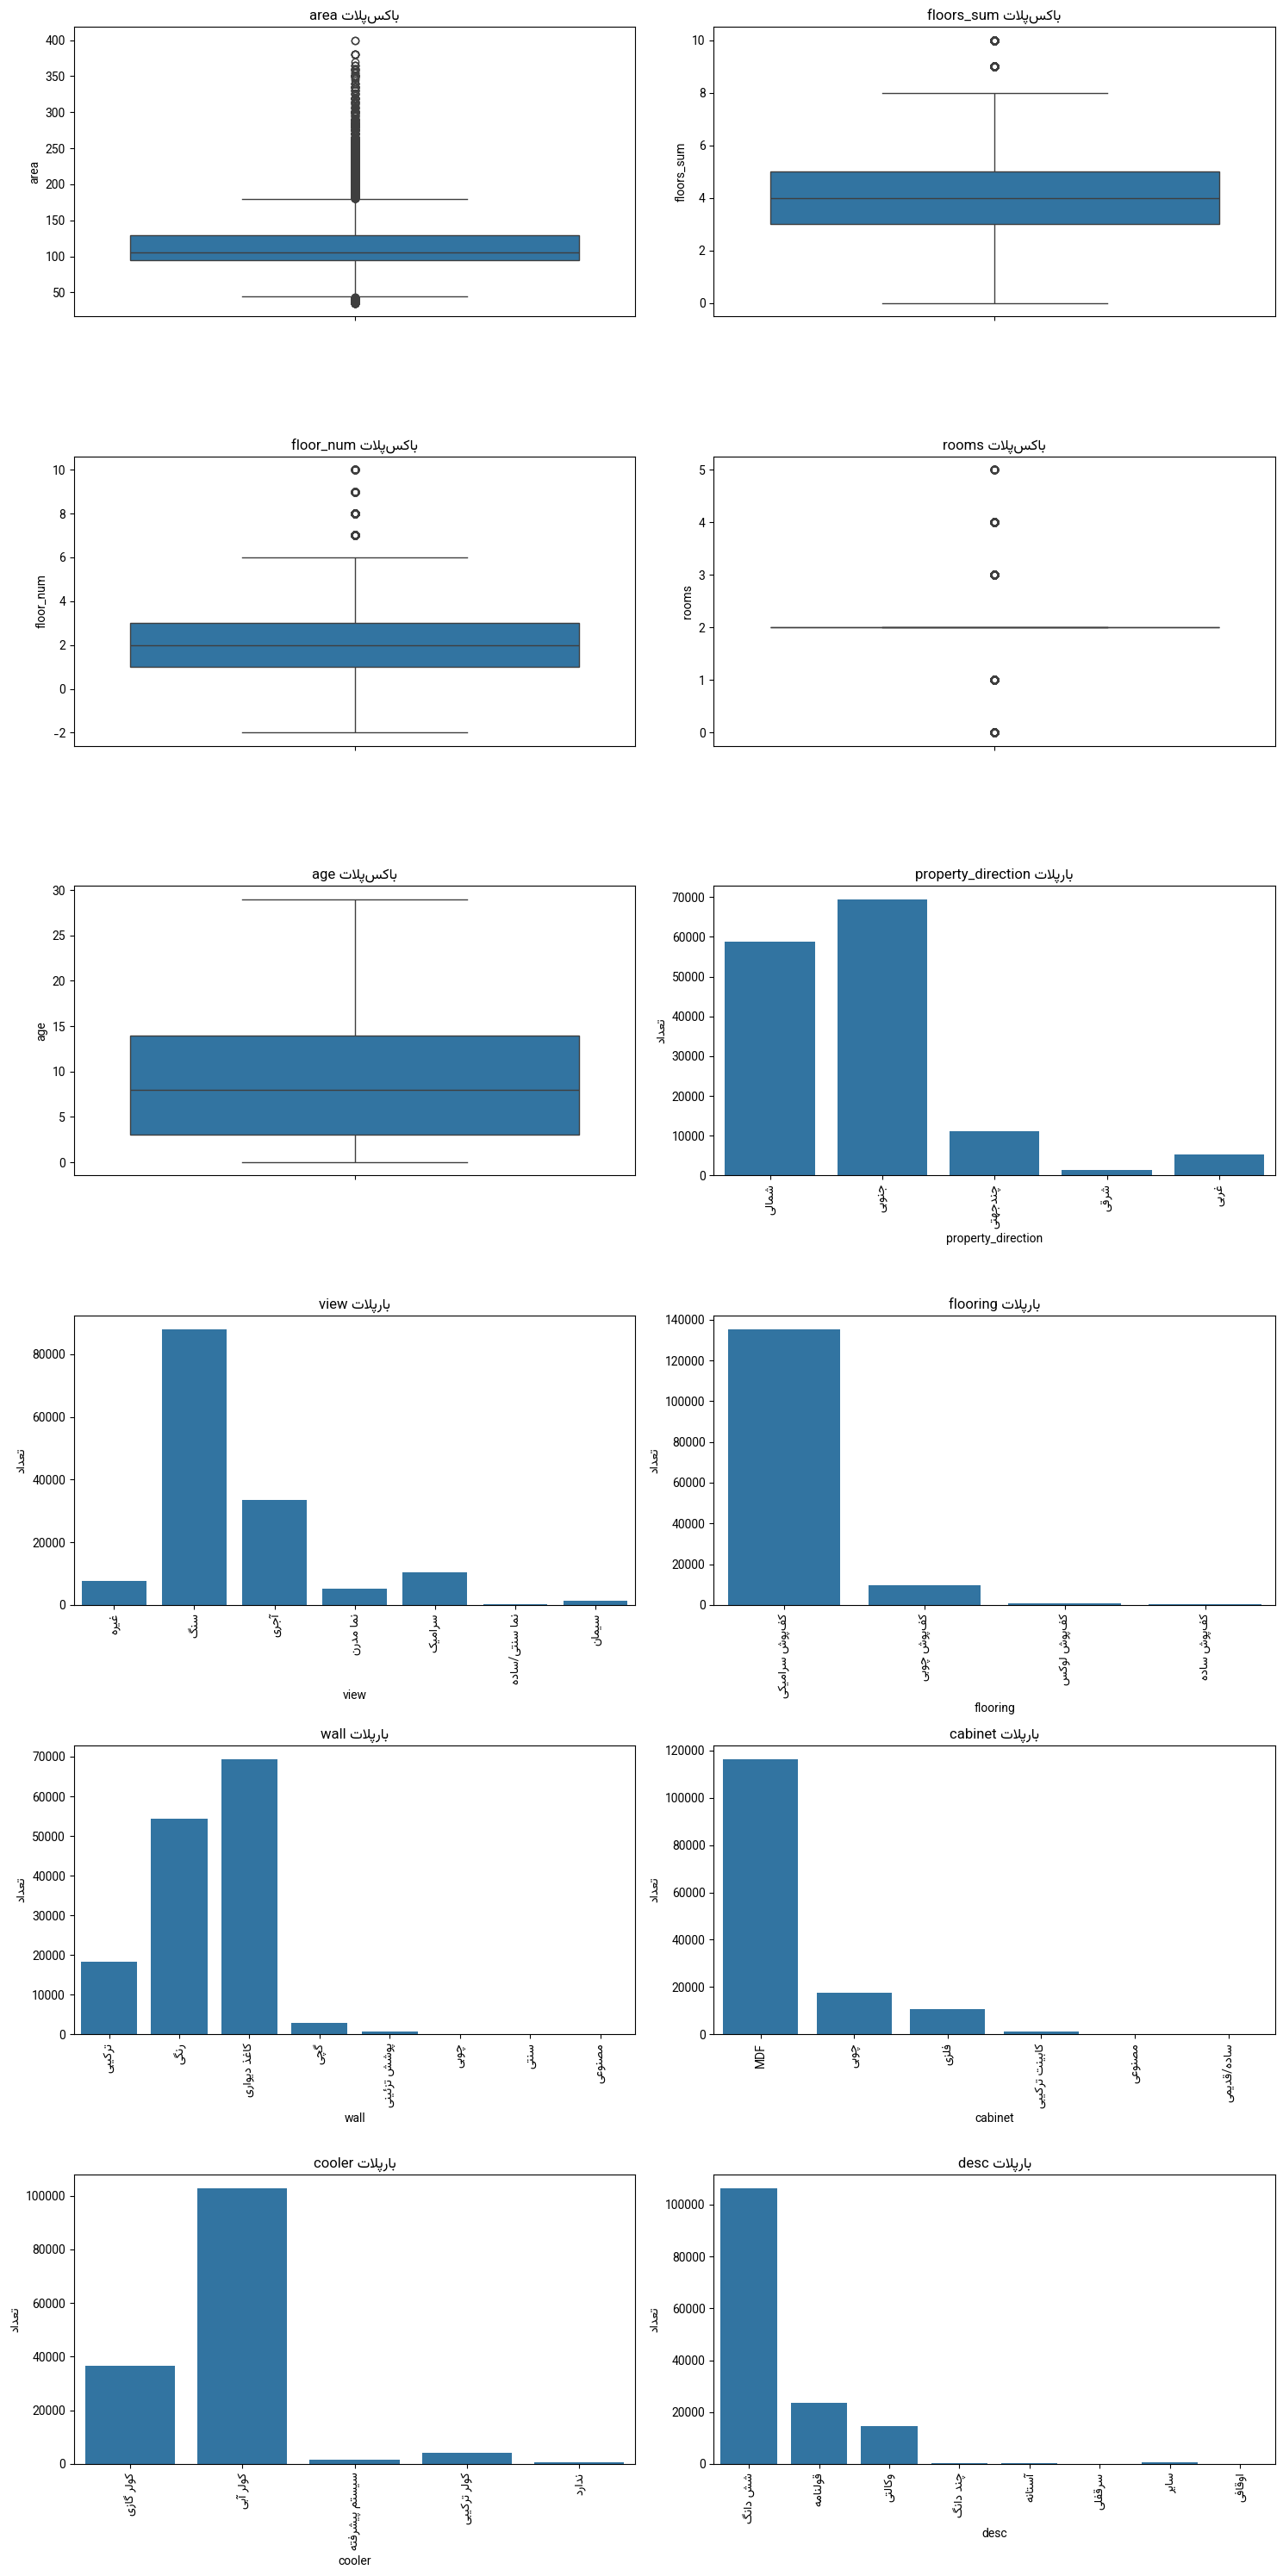

In [20]:
from matplotlib import font_manager
font_path = '../fonts/Vazirmatn-Regular.ttf' 
if not font_path:
    # اگه فونت رو نصب کردی، فقط اسم فونت رو بذار
    font_name = 'Vazirmatn'
else:
    font_manager.fontManager.addfont(font_path)
    font_name = font_manager.FontProperties(fname=font_path).get_name()

def persian_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)
# تنظیم فونت پیش‌فرض برای matplotlib
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
numeric_columns = ['area', 'floors_sum', 'floor_num', 'rooms', 'age']
categorical_columns = ['property_direction', 'view', 'flooring', 'wall', 'cabinet', 'cooler','desc']
all_columns = numeric_columns + categorical_columns  # 11 ستون

# 4. تنظیمات چیدمان (2 نمودار در هر سطر)
n_cols = 2  # تعداد ستون‌ها در هر سطر
n_rows = (len(all_columns) + 1) // 2  # تعداد سطرها (11 نمودار → 6 سطر)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # تبدیل به آرایه یک‌بعدی برای دسترسی راحت‌تر

# 5. رسم نمودارها
for i, column in enumerate(all_columns):
    if column in numeric_columns:
        # باکس‌پلات برای ستون‌های عددی
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(persian_text(f'باکس‌پلات {column}'))
        axes[i].set_ylabel(persian_text(column))
    else:
        # بارپلات برای ستون‌های دسته‌ای
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(persian_text(f'بارپلات {column}'))
        axes[i].set_xlabel(persian_text(column))
        axes[i].set_ylabel(persian_text('تعداد'))
        axes[i].tick_params(axis='x', rotation=90)
        # تنظیم برچسب‌های محور x برای نمایش درست فارسی
        labels = axes[i].get_xticklabels()
        new_labels = [persian_text(label.get_text()) for label in labels]
        axes[i].set_xticklabels(new_labels, rotation=90)

# 6. حذف محورهای اضافی (اگه تعداد نمودارها فرد باشه)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 7. تنظیم فاصله‌ها و نمایش
plt.tight_layout()
plt.show()


In [ ]:
# /def convert_to_boolean(value):
#     # مقادیر نشان‌دهنده وجود پارکینگ
#     if value in ['پارکینگ', 'دارد', 'TRUE']:
#         return True
#     # مقادیر نشان‌دهنده عدم وجود پارکینگ
#     elif value in [0.0, 'ندارد', 'FALSE']:
#         return False
#     # اگر مقدار دیگری بود (مثلاً NaN)، همان مقدار را برگردان
#     return value

# # اعمال تابع به ستون parking
# df['parking'] = df['parking'].apply(convert_to_boolean)
# df['elevator'] = df['elevator'].apply(convert_to_boolean)

# def normalize_facilities(value):
#     if pd.isna(value):  # اگر مقدار null بود، همان را برگردان
#         return value
#     # تبدیل به رشته
#     value_str = str(value)
#     # حذف کروشه‌ها و کوتیشن‌ها
#     value_str = value_str.replace('[', '').replace(']', '').replace("'", '').replace('"', '')
#     # نرمال‌سازی و حذف فاصله‌های اضافی بین کلمات
#     value_str = ','.join(word.strip() for word in value_str.split(',') if word.strip())
#     # حذف فاصله‌های اضافی از ابتدا و انتها
#     value_str = value_str.strip()
#     return value_str

# # اعمال تابع به ستون facilities
# df['facilities'] = df['facilities'].apply(normalize_facilities)

# def check_facility(facilities, items):
#     if pd.isna(facilities):
#         return False
#     # جدا کردن آیتم‌ها
#     facility_list = facilities.split(',')
#     # بررسی هر آیتم در items
#     for item in items:
#         # بررسی می‌کنیم آیا item در هر یک از facility_list به عنوان بخشی از رشته وجود دارد
#         if any(item in facility.strip() for facility in facility_list):
#             return True
#     return False

# # 1. اضافه کردن ستون anbari
# df['Warehouse'] = df['facilities'].apply(lambda x: check_facility(x, 'انباری'))
# df['Wardrobe'] = df['facilities'].apply(lambda x: check_facility(x, ['کمددیواری', 'کمد دیواری']))
# # 2. به‌روزرسانی ستون parking بر اساس facilities
# mask = (df['parking'] == False) & (df['facilities'].apply(lambda x: check_facility(x, 'پارکینگ')))
# df.loc[mask, 'parking'] = True

# mask = (df['elevator'] == False) & (df['facilities'].apply(lambda x: check_facility(x, ['آسانسور', 'اسانسور'])))
# df.loc[mask, 'elevator'] = True

# mask = (df['cooler'].isna()) & (df['facilities'].apply(lambda x: check_facility(x, ['اسپیلیت', 'داکت اسپلیت','اسپلیت','فن','فن کوئل','داکت اسپیلت'])))
# df.loc[mask, 'cooler'] = 'سیستم پیشرفته'

# def check_warmer(facilities):
#     if pd.isna(facilities):
#         return None
    
#     facility_list = facilities.split(',')
#     warmer_types = {
#         'شوفاژ': 'شوفاژ',
#         'پکیج': 'پکیج',
#         'پکبج':'پکیج',
#         'گرما از کف': 'کف',
#         'گرمایش': 'کف',
#         'بخاری': 'بخاری',
#         'شومینه': 'شومینه'
#     }
    
#     # نرمال‌سازی و بررسی تمام آیتم‌ها
#     found_warmer = None
#     for facility in facility_list:
#         facility = facility.strip()
#         # نرمال‌سازی برای تنوع در املا
#         facility = facility.replace('ي', 'ی')  # تبدیل "ی" عربی به "ی" معمولی
#         for key, value in warmer_types.items():
#             if key in facility:
#                 # اولویت‌بندی: اگر پکیج پیدا شد، آن را ترجیح می‌دهیم
#                 if key == 'پکیج':
#                     return 'پکیج'
#                 if not found_warmer:  # اولین تطابق را ذخیره می‌کنیم
#                     found_warmer = value
    
#     return found_warmer if found_warmer else None

# # اضافه کردن ستون warmer
# df['warmer'] = df['facilities'].apply(check_warmer)


# parking_items = ['پارکینگ', 'پارک']
# elevator_items = ['آسانسور', 'اسانسور']
# warehouse_items = ['انباری']
# wardrobe_items = ['کمددیواری', 'کمد دیواری']
# cooler_items = ['اسپیلیت', 'داکت اسپلیت', 'اسپلیت', 'فن', 'فن کوئل', 'داکت اسپیلت']
# warmer_items = ['شوفاژ', 'پکیج', 'پکبج', 'گرما از کف', 'گرمایش', 'بخاری', 'شومینه']

# # تمام آیتم‌هایی که در ستون‌های دیگر پوشش داده شده‌اند
# all_covered_items = set(parking_items + elevator_items + warehouse_items + wardrobe_items + cooler_items + warmer_items)

# # تابع برای حذف آیتم‌های پوشش‌داده‌شده از facilities
# def filter_facilities(facilities):
#     if pd.isna(facilities):
#         return None
    
#     # جداسازی آیتم‌ها
#     facility_list = [item.strip() for item in facilities.split(',') if item.strip()]
    
#     # حذف آیتم‌هایی که در ستون‌های دیگر پوشش داده شده‌اند
#     filtered_list = []
#     for item in facility_list:
#         # بررسی می‌کنیم که آیا این آیتم در لیست پوشش‌داده‌شده‌ها هست یا خیر
#         if not any(covered_item in item for covered_item in all_covered_items):
#             filtered_list.append(item)
    
#     # اگر هیچ آیتمی باقی نماند، None برگردان
#     return ','.join(filtered_list) if filtered_list else None

# # به‌روزرسانی ستون facilities
# df['uni_facilities'] = df['facilities'].apply(filter_facilities)


# def count_facilities(facilities):
#     if pd.isna(facilities):
#         return 0
#     return len([item.strip() for item in facilities.split(',') if item.strip()])

# df['facility_count'] = df['uni_facilities'].apply(count_facilities)
# def extract_date_components(date):
#     if pd.isna(date):
#         return None, None  # فقط دو مقدار
#     try:
#         year, month, _ = date.split('/')
#         return month, year  # فقط month و year را برگردان
#     except (IndexError, AttributeError):
#         return None, None

# # اعمال تابع برای استخراج month و year
# df[['month', 'year']] = df['date'].apply(lambda x: pd.Series(extract_date_components(x)))

# # محاسبه sequential_month
# # ابتدا سال‌ها و ماه‌ها را به صورت عددی تبدیل می‌کنیم
# df['year'] = pd.to_numeric(df['year'], errors='coerce')
# df['month'] = pd.to_numeric(df['month'], errors='coerce')

# # محاسبه شماره ماه متوالی
# df['sequential_month'] = (df['year'] - df['year'].min()) * 12 + df['month']
# df = df[df['area'] <= 400]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\L

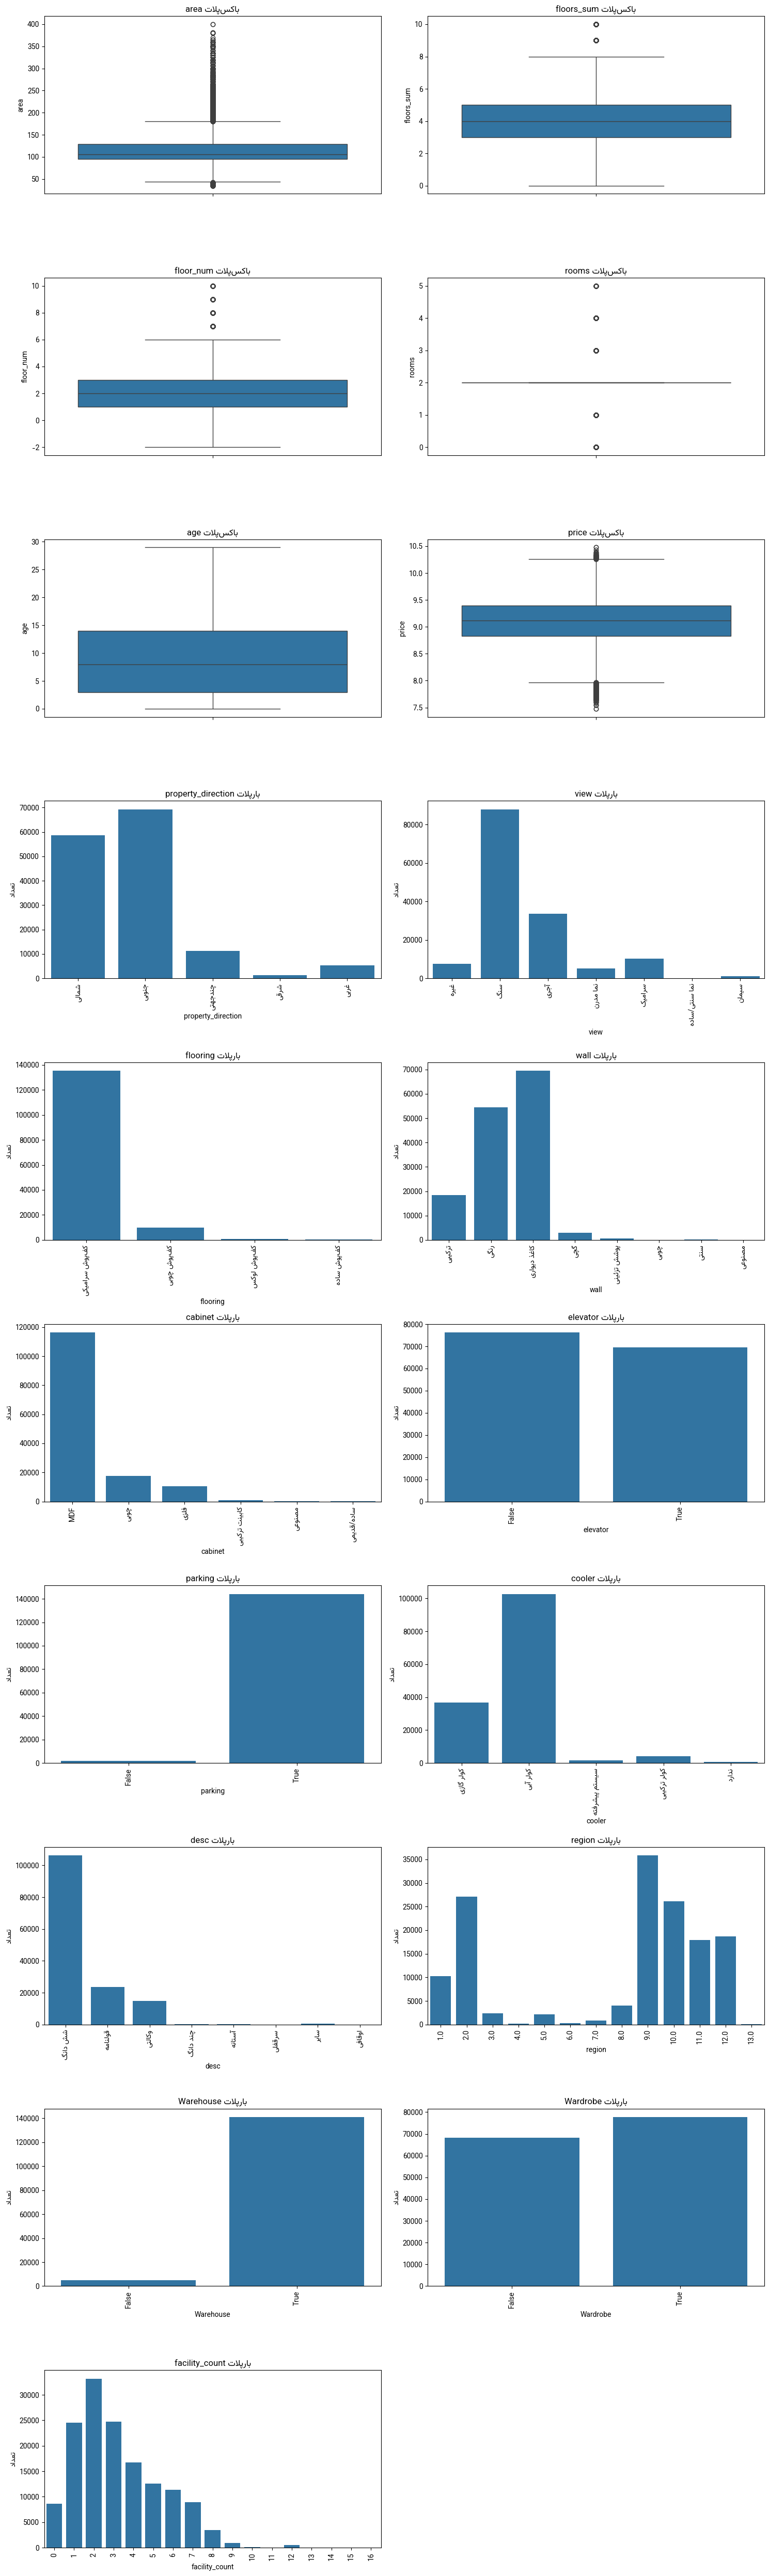

In [21]:
from matplotlib import font_manager
font_path = '../fonts/Vazirmatn-Regular.ttf' 
if not font_path:
    # اگه فونت رو نصب کردی، فقط اسم فونت رو بذار
    font_name = 'Vazirmatn'
else:
    font_manager.fontManager.addfont(font_path)
    font_name = font_manager.FontProperties(fname=font_path).get_name()

def persian_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)
# تنظیم فونت پیش‌فرض برای matplotlib
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
numeric_columns = ['area', 'floors_sum', 'floor_num', 'rooms', 'age','price']
categorical_columns = ['property_direction', 'view', 'flooring', 'wall', 'cabinet','elevator', 'parking', 'cooler','desc','region', 'Warehouse', 'Wardrobe','facility_count']
all_columns = numeric_columns + categorical_columns  # 11 ستون

# 4. تنظیمات چیدمان (2 نمودار در هر سطر)
n_cols = 2  # تعداد ستون‌ها در هر سطر
n_rows = (len(all_columns) + 1) // 2  # تعداد سطرها (11 نمودار → 6 سطر)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # تبدیل به آرایه یک‌بعدی برای دسترسی راحت‌تر

# 5. رسم نمودارها
for i, column in enumerate(all_columns):
    if column in numeric_columns:
        # باکس‌پلات برای ستون‌های عددی
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(persian_text(f'باکس‌پلات {column}'))
        axes[i].set_ylabel(persian_text(column))
    else:
        # بارپلات برای ستون‌های دسته‌ای
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(persian_text(f'بارپلات {column}'))
        axes[i].set_xlabel(persian_text(column))
        axes[i].set_ylabel(persian_text('تعداد'))
        axes[i].tick_params(axis='x', rotation=90)
        # تنظیم برچسب‌های محور x برای نمایش درست فارسی
        labels = axes[i].get_xticklabels()
        new_labels = [persian_text(label.get_text()) for label in labels]
        axes[i].set_xticklabels(new_labels, rotation=90)

# 6. حذف محورهای اضافی (اگه تعداد نمودارها فرد باشه)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 7. تنظیم فاصله‌ها و نمایش
plt.tight_layout()
plt.show()


## Make Models

In [46]:
df.columns

Index(['link', 'date', 'address', 'area', 'floors_sum', 'floor_num', 'rooms',
       'property_direction', 'view', 'flooring', 'wall', 'cabinet', 'cooler',
       'age', 'elevator', 'parking', 'desc', 'price', 'facilities', 'Dollar',
       'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe', 'warmer',
       'uni_facilities', 'facility_count', 'month', 'year',
       'sequential_month'],
      dtype='object')

In [23]:
import pandas as pd

# ستون‌های کتگوریکال که می‌خواهیم عددی کنیم
categorical_columns = ['property_direction', 'view', 'flooring', 'wall', 'cabinet', 'cooler']

# تابع برای تبدیل کتگوریکال به عددی بر اساس میانگین قیمت (از بالا به پایین)
def encode_categorical_by_price(df, column):
    # محاسبه میانگین قیمت برای هر دسته
    price_means = df.groupby(column)['price'].median().sort_values(ascending=False)
    
    # نمایش میانگین‌ها برای بررسی
    print(f"\nمیانگین قیمت برای ستون {column}:")
    print(price_means)
    
    # تعداد دسته‌ها
    n_categories = len(price_means)
    
    # تخصیص اعداد به دسته‌ها (بزرگ‌تر برای قیمت بالاتر)
    category_to_int = {category: n_categories - idx for idx, category in enumerate(price_means.index)}
    
    # نمایش نگاشت برای بررسی
    print(f"نگاشت برای ستون {column}:")
    print(category_to_int)
    
    # جایگزینی مقادیر کتگوریکال با اعداد
    df[column + '_encoded'] = df[column].map(category_to_int)
    
    return df

# اعمال تابع برای هر ستون کتگوریکال
for col in categorical_columns:
    df = encode_categorical_by_price(df, col)


df.loc[df['desc'].isin(['شش دانگ', 'شش دانگ ', 'تک برگی', 'سند سیم سرب',' شش دانگ']), 'desc_encoded'] = 3
df.loc[df['desc'].isin(['قولنامه', 'قولنامه  ای', 'وکالتی',' وکالتی',' قولنامه ای']), 'desc_encoded'] = 2
df.loc[df['desc'].isin(['اوقافی', 'آستانه‌ای،','آستانه', 'شش دانگ وقفی', 'سه دانگ', 'سه دانگ ', 'سرقفلی', 'سادات',' سه دانگ','چند دانگ','سایر']), 'desc_encoded'] = 1




میانگین قیمت برای ستون property_direction:
property_direction
شرقی       9.176091
شمالی      9.146128
جنوبی      9.113943
غربی       9.003029
چندجهتی    9.000000
Name: price, dtype: float64
نگاشت برای ستون property_direction:
{'شرقی': 5, 'شمالی': 4, 'جنوبی': 3, 'غربی': 2, 'چندجهتی': 1}

میانگین قیمت برای ستون view:
view
سنگ              9.204120
غیره             9.075547
نما مدرن         9.041393
آجری             9.000000
نما سنتی/ساده    8.954243
سرامیک           8.913814
سیمان            8.857332
Name: price, dtype: float64
نگاشت برای ستون view:
{'سنگ': 7, 'غیره': 6, 'نما مدرن': 5, 'آجری': 4, 'نما سنتی/ساده': 3, 'سرامیک': 2, 'سیمان': 1}

میانگین قیمت برای ستون flooring:
flooring
کف‌پوش لوکس       9.315970
کف‌پوش چوبی       9.146128
کف‌پوش سرامیکی    9.113943
کف‌پوش ساده       8.866197
Name: price, dtype: float64
نگاشت برای ستون flooring:
{'کف\u200cپوش لوکس': 4, 'کف\u200cپوش چوبی': 3, 'کف\u200cپوش سرامیکی': 2, 'کف\u200cپوش ساده': 1}

میانگین قیمت برای ستون wall:
wall
چوبی           9

--- محاسبه ماتریس همبستگی ---


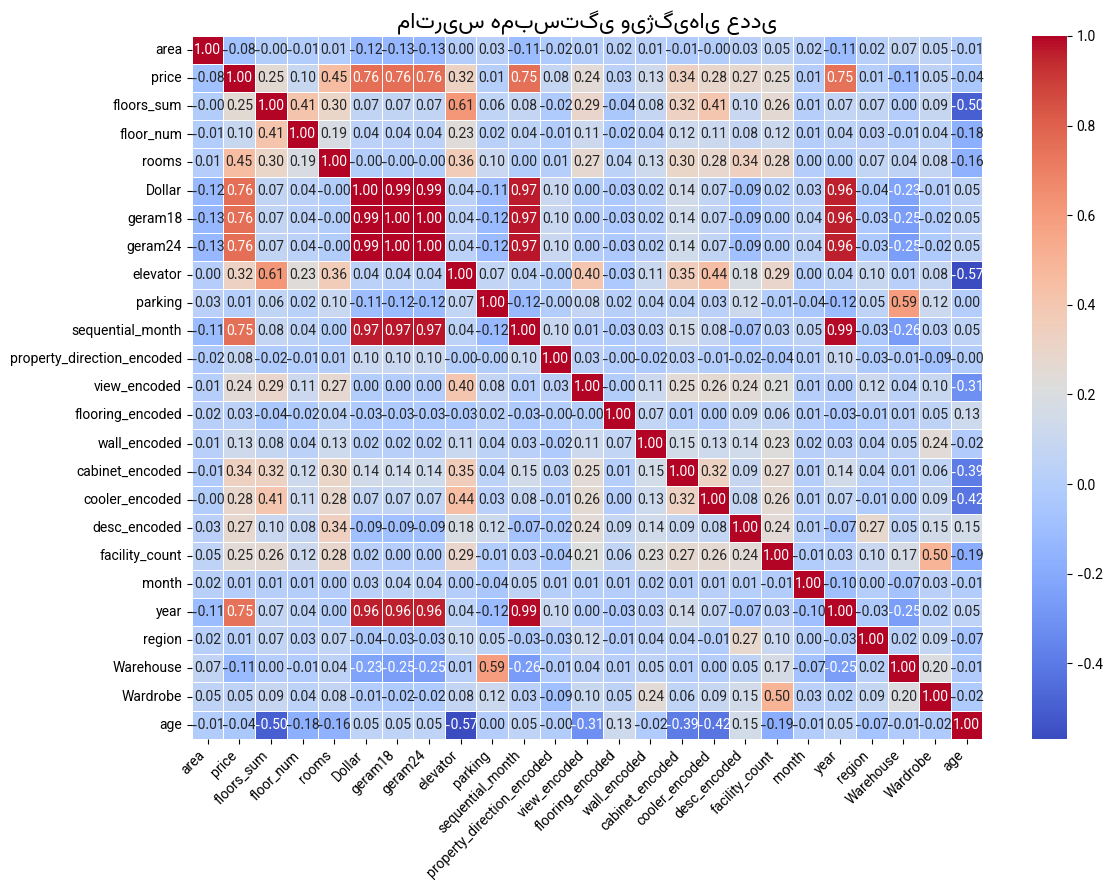


--- تحلیل واریانس (ANOVA) در برابر 'age' ---

* بررسی رابطه بین 'property_direction_encoded' و 'age':
  - F-Statistic: 127.3274
  - P-value: 0.0000
  - نتیجه: رابطه معناداری (p < 0.05) بین 'property_direction_encoded' و 'age' وجود دارد.

* بررسی رابطه بین 'view_encoded' و 'age':
  - F-Statistic: 7666.5927
  - P-value: 0.0000
  - نتیجه: رابطه معناداری (p < 0.05) بین 'view_encoded' و 'age' وجود دارد.

* بررسی رابطه بین 'flooring_encoded' و 'age':
  - F-Statistic: 1170.8058
  - P-value: 0.0000
  - نتیجه: رابطه معناداری (p < 0.05) بین 'flooring_encoded' و 'age' وجود دارد.

* بررسی رابطه بین 'wall_encoded' و 'age':
  - F-Statistic: 582.0121
  - P-value: 0.0000
  - نتیجه: رابطه معناداری (p < 0.05) بین 'wall_encoded' و 'age' وجود دارد.

* بررسی رابطه بین 'cabinet_encoded' و 'age':
  - F-Statistic: 5527.3225
  - P-value: 0.0000
  - نتیجه: رابطه معناداری (p < 0.05) بین 'cabinet_encoded' و 'age' وجود دارد.

* بررسی رابطه بین 'cooler_encoded' و 'age':
  - F-Statistic: 7825.0479
  - P-value: 0.00

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats



# --- 1. ماتریس همبستگی برای ویژگی‌های عددی ---

def plot_correlation_matrix(df, numerical_cols):
    """
    ماتریس همبستگی برای ستون‌های عددی مشخص شده را محاسبه و رسم می‌کند.

    Args:
        df (pd.DataFrame): دیتافریم ورودی.
        numerical_cols (list): لیستی از نام ستون‌های عددی.
    """
    print("--- محاسبه ماتریس همبستگی ---")
    if not numerical_cols:
        print("لیست ستون‌های عددی خالی است.")
        return

    # انتخاب فقط ستون‌های عددی و محاسبه همبستگی
    corr_matrix = df[numerical_cols].corr()

    # رسم هیت‌مپ (نقشه حرارتی)
    plt.figure(figsize=(12, 9))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('ماتریس همبستگی ویژگی‌های عددی', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout() # برای جلوگیری از روی هم افتادن لیبل‌ها
    plt.show()

# --- 2. تحلیل واریانس (ANOVA) برای ویژگی‌های دسته‌بندی ---

def perform_anova(df, categorical_cols, target_col):
    """
    تحلیل واریانس یک‌طرفه (One-way ANOVA) را برای هر ستون دسته‌بندی
    در برابر ستون هدف عددی انجام می‌دهد.

    Args:
        df (pd.DataFrame): دیتافریم ورودی.
        categorical_cols (list): لیستی از نام ستون‌های دسته‌بندی.
        target_col (str): نام ستون هدف عددی (مثلاً 'age').
    """
    print(f"\n--- تحلیل واریانس (ANOVA) در برابر '{target_col}' ---")
    if not categorical_cols:
        print("لیست ستون‌های دسته‌بندی خالی است.")
        return
    
    if target_col not in df.columns:
        print(f"ستون هدف '{target_col}' در دیتافریم یافت نشد.")
        return

    for col in categorical_cols:
        if col not in df.columns:
            print(f"ستون '{col}' یافت نشد، رد می‌شود.")
            continue
            
        print(f"\n* بررسی رابطه بین '{col}' و '{target_col}':")

        # حذف مقادیر NaN هم در ستون دسته‌بندی و هم در ستون هدف
        temp_df = df[[col, target_col]].dropna()

        # ایجاد لیستی از گروه‌ها (مقادیر ستون هدف برای هر دسته)
        groups = [temp_df[target_col][temp_df[col] == category] for category in temp_df[col].unique()]

        # اطمینان از اینکه حداقل دو گروه برای مقایسه وجود دارد
        if len(groups) < 2:
            print("  - حداقل دو گروه برای انجام ANOVA وجود ندارد.")
            continue

        # انجام تست ANOVA
        try:
            f_statistic, p_value = stats.f_oneway(*groups)
            print(f"  - F-Statistic: {f_statistic:.4f}")
            print(f"  - P-value: {p_value:.4f}")

            # تفسیر P-value
            if p_value < 0.05:
                print(f"  - نتیجه: رابطه معناداری (p < 0.05) بین '{col}' و '{target_col}' وجود دارد.")
            else:
                print(f"  - نتیجه: رابطه معناداری (p >= 0.05) بین '{col}' و '{target_col}' یافت نشد.")
        except Exception as e:
            print(f"  - خطایی در اجرای ANOVA رخ داد: {e}")


# --- اجرای توابع ---

# **مهم:** لطفا این لیست‌ها را با نام ستون‌های واقعی دیتافریم خودتان جایگزین کنید!
numerical_columns = ['area', 'price',  'floors_sum', 'floor_num', 'rooms','Dollar',
       'geram18', 'geram24','elevator', 'parking', 'sequential_month','property_direction_encoded', 'view_encoded', 'flooring_encoded',
       'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded','facility_count', 'month', 'year','region', 'Warehouse', 'Wardrobe','age']

# اضافه کردن پسوند '_encoded' به هر نام ستون
categorical_columns = ['property_direction_encoded', 'view_encoded', 'flooring_encoded',
       'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded','facility_count', 'month', 'year','region', 'Warehouse', 'Wardrobe','elevator', 'parking']
target_variable = 'age' # ستونی که می‌خواهید رابطه بقیه را با آن بسنجید

# رسم ماتریس همبستگی
plot_correlation_matrix(df.copy(), numerical_columns)

# انجام ANOVA
perform_anova(df.copy(), categorical_columns, target_variable)

--- رسم نمودارهای Box Plot ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


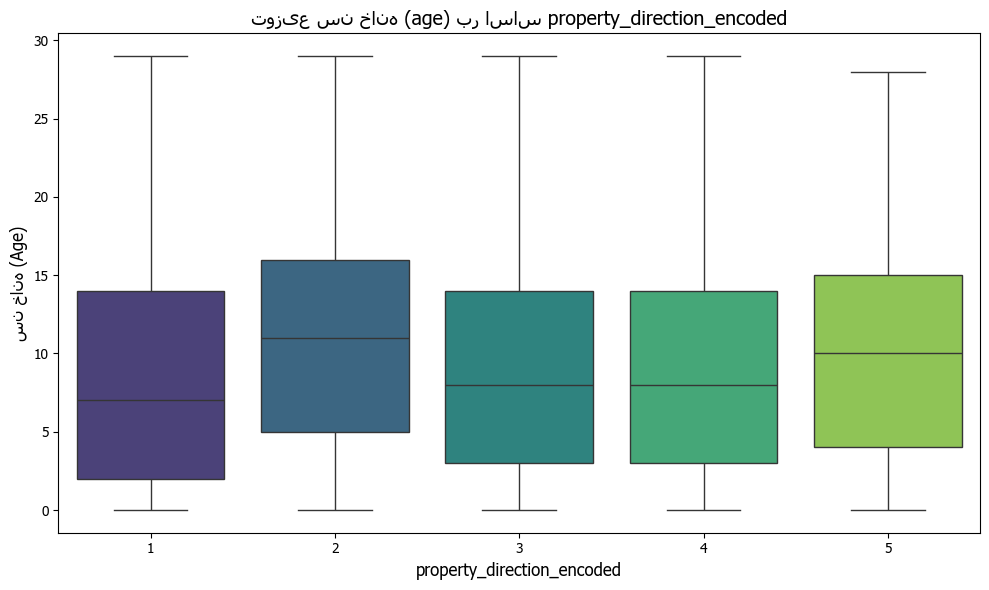

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


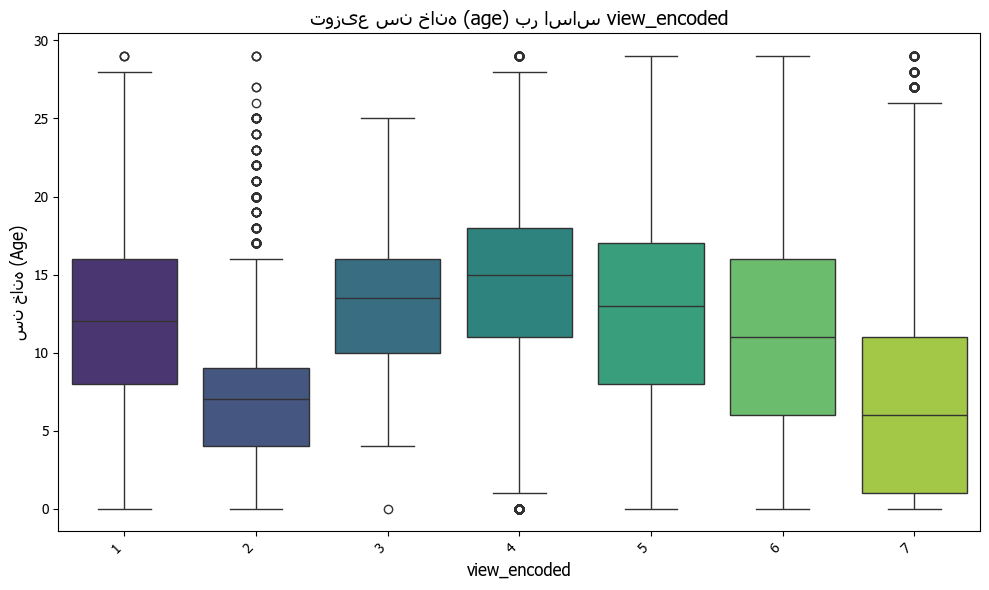

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


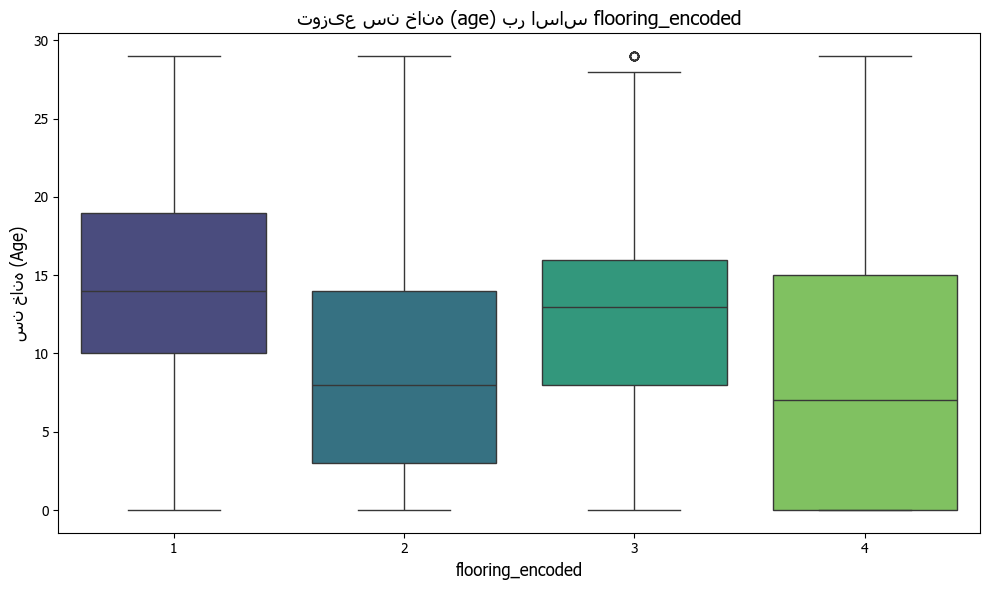

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


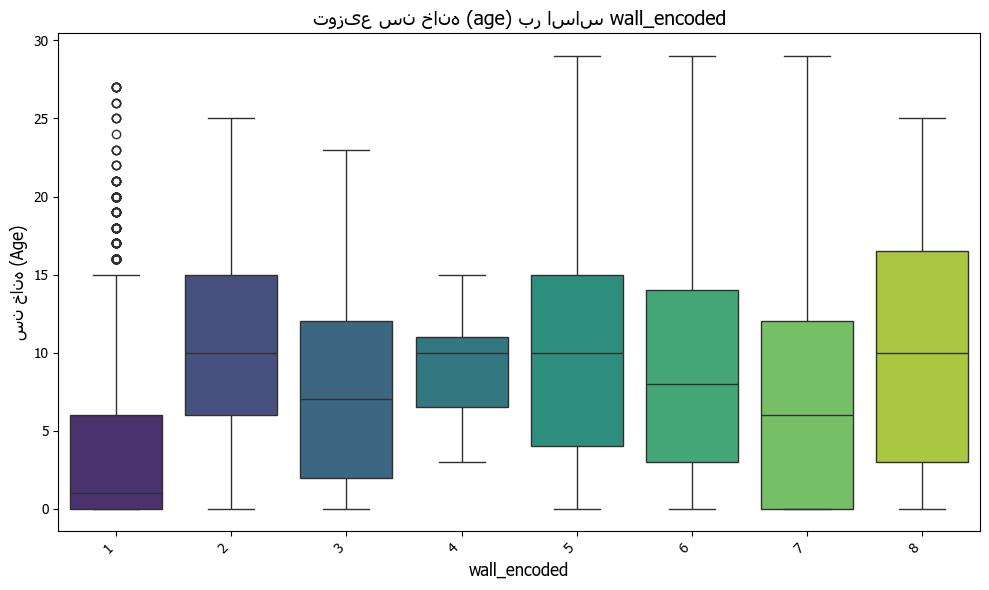

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


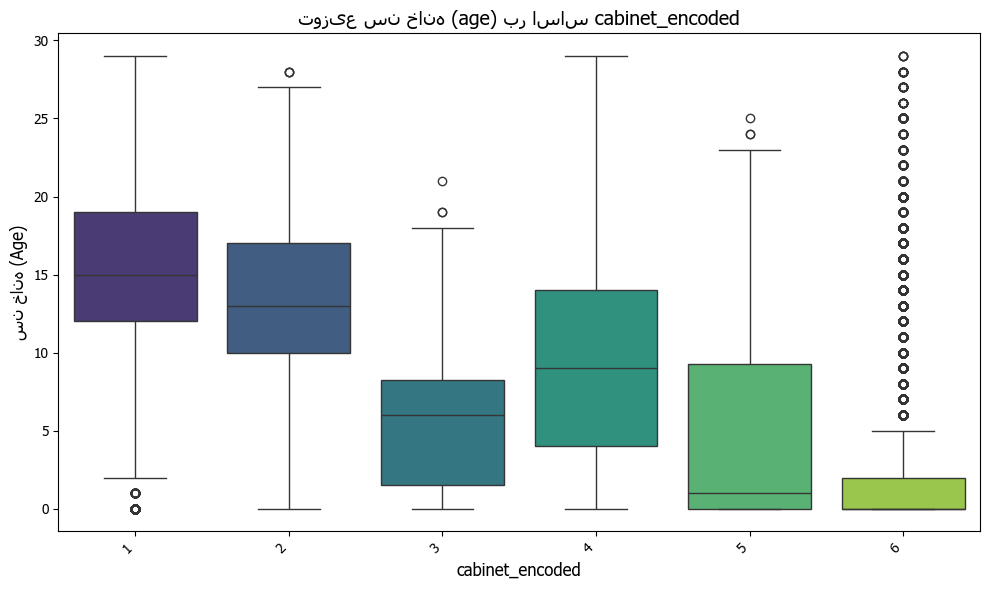

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


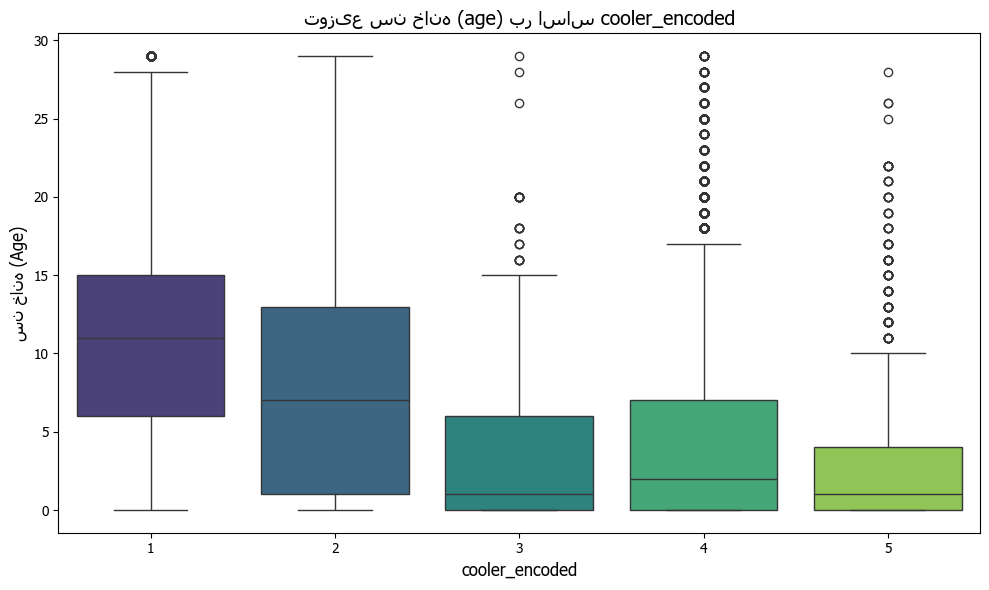

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


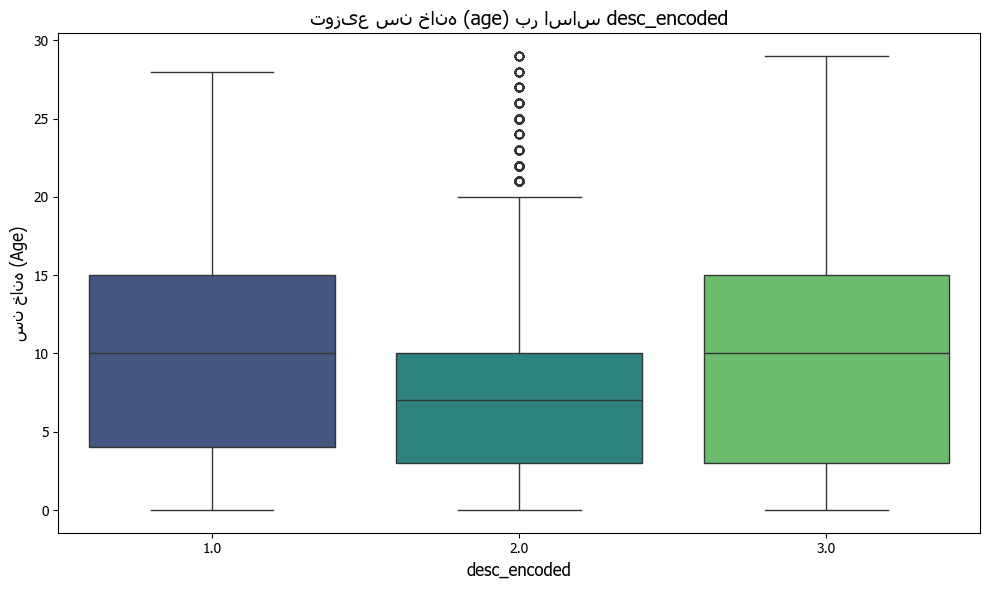

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


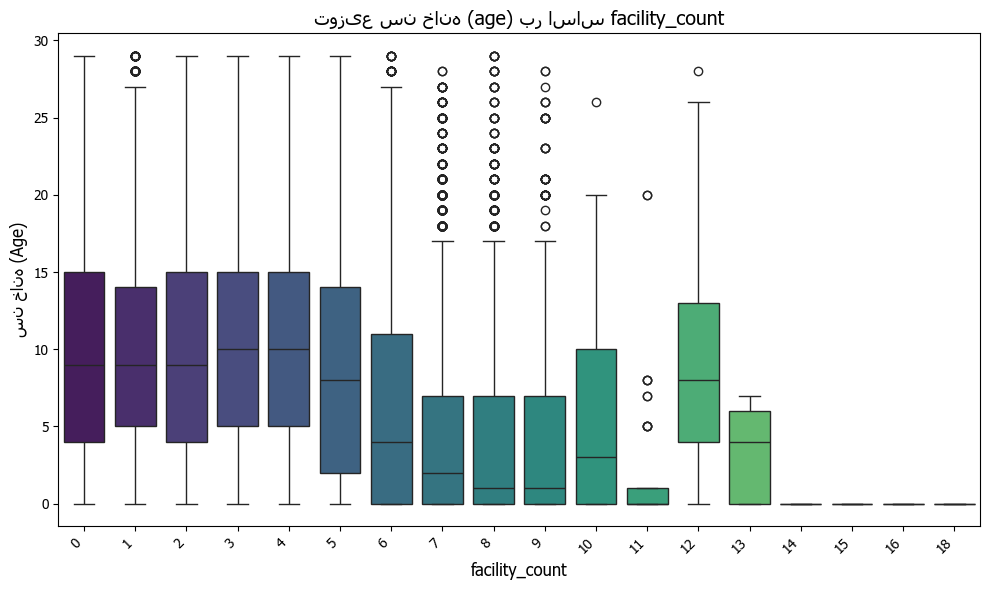

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


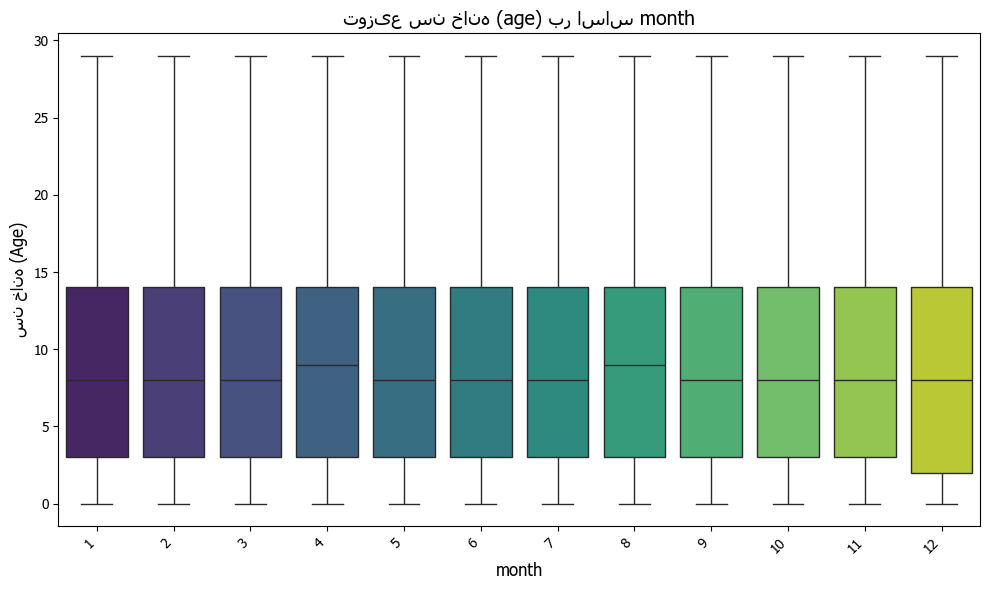

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


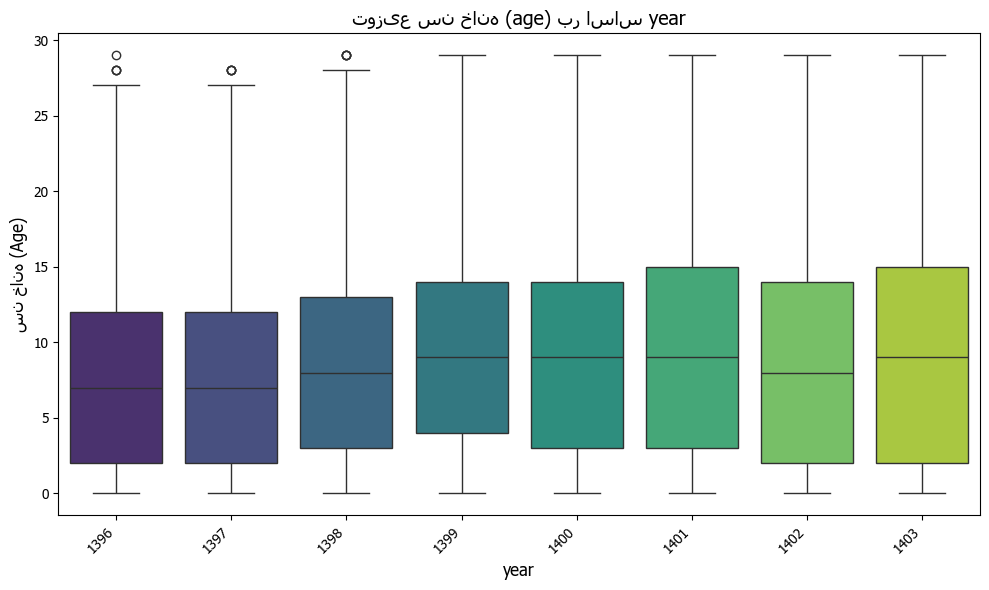

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


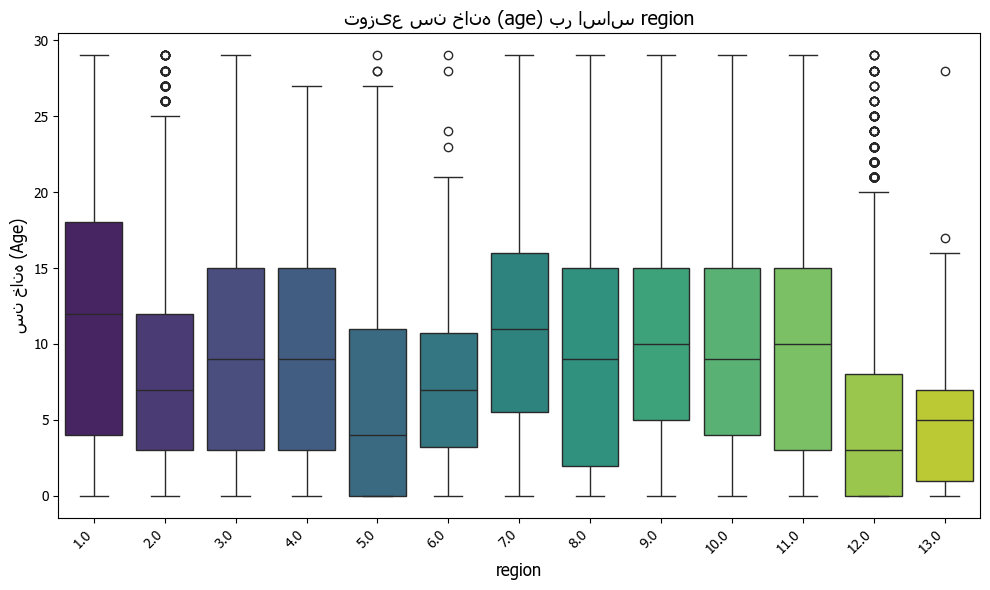

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


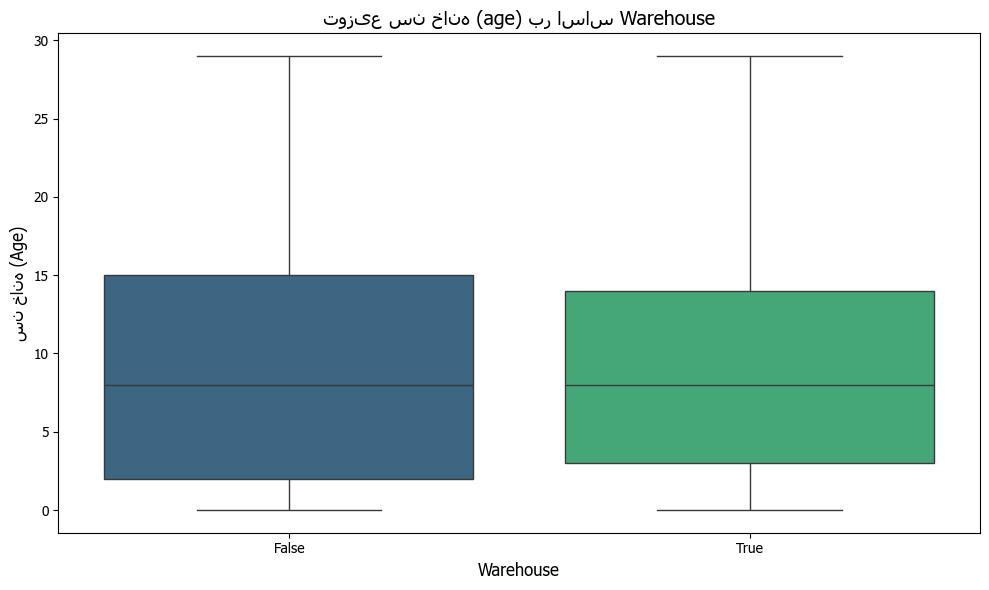

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


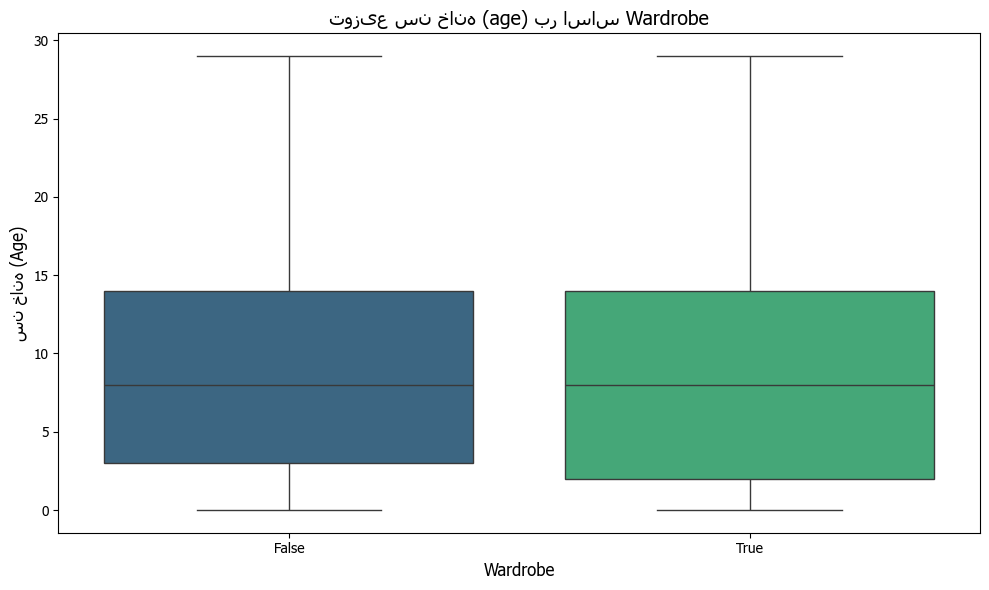

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


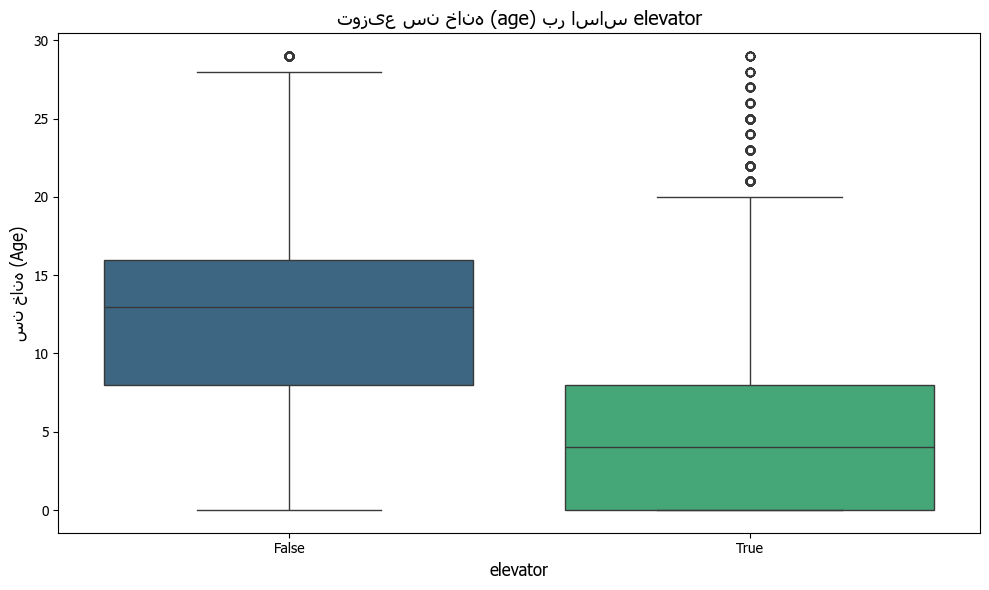

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\126929960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')


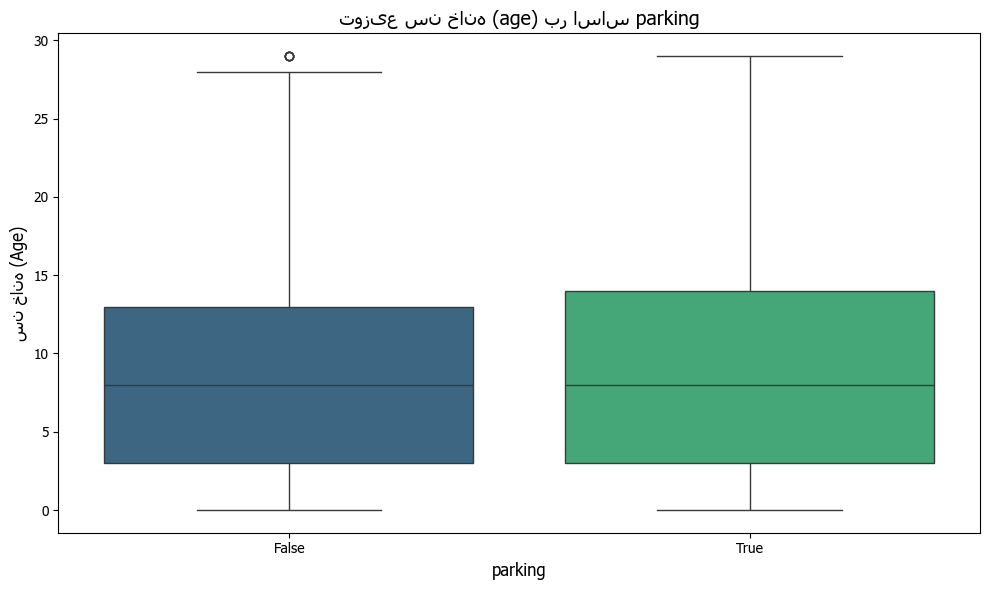

In [70]:
try:
    plt.rcParams['font.family'] = 'Tahoma' # یا هر فونت فارسی دیگر که نصب دارید
    plt.rcParams['axes.unicode_minus'] = False # برای نمایش صحیح علامت منفی
except:
    print("فونت فارسی مناسب یافت نشد. ممکن است لیبل‌ها به درستی نمایش داده نشوند.")
# ---------------------------------------------------------------------


# لیست ویژگی‌های کلیدی برای رسم نمودار
key_features = ['property_direction_encoded', 'view_encoded', 'flooring_encoded',
       'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded','facility_count', 'month', 'year','region', 'Warehouse', 'Wardrobe','elevator', 'parking']
target_variable = 'age'

print("--- رسم نمودارهای Box Plot ---")

# رسم نمودار برای هر ویژگی
for feature in key_features:
    if feature in df.columns:
        plt.figure(figsize=(10, 6)) # اندازه نمودار
        
        # رسم Box Plot با Seaborn
        sns.boxplot(x=feature, y=target_variable, data=df, palette='viridis')
        
        # تنظیم عنوان و لیبل‌ها
        plt.title(f'توزیع سن خانه ({target_variable}) بر اساس {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('سن خانه (Age)', fontsize=12)
        
        # چرخش لیبل‌های محور X در صورت نیاز (اگر تعداد دسته‌ها زیاد بود)
        if df[feature].nunique() > 5:
            plt.xticks(rotation=45, ha='right')
            
        plt.tight_layout() # تنظیم چیدمان برای جلوگیری از روی هم افتادگی
        plt.show() # نمایش نمودار
    else:
        print(f"ستون '{feature}' در دیتافریم یافت نشد.")



داده‌ها با موفقیت بارگذاری و تقسیم شدند.

--- شروع فرآیند حذف ویژگی دستی ---
تعداد ویژگی‌ها: 23 | R²: 0.6835 | RMSE: 3.7701 | MAE: 2.7848
  > حذف ویژگی: Warehouse
تعداد ویژگی‌ها: 22 | R²: 0.6832 | RMSE: 3.7719 | MAE: 2.7861
  > حذف ویژگی: parking
تعداد ویژگی‌ها: 21 | R²: 0.6835 | RMSE: 3.7702 | MAE: 2.7850
  > حذف ویژگی: year
تعداد ویژگی‌ها: 20 | R²: 0.6834 | RMSE: 3.7705 | MAE: 2.7856
  > حذف ویژگی: Wardrobe
تعداد ویژگی‌ها: 19 | R²: 0.6828 | RMSE: 3.7739 | MAE: 2.7871
  > حذف ویژگی: flooring_encoded
تعداد ویژگی‌ها: 18 | R²: 0.6820 | RMSE: 3.7791 | MAE: 2.7932
  > حذف ویژگی: property_direction_encoded
تعداد ویژگی‌ها: 17 | R²: 0.6799 | RMSE: 3.7916 | MAE: 2.8017
  > حذف ویژگی: month
تعداد ویژگی‌ها: 16 | R²: 0.6810 | RMSE: 3.7847 | MAE: 2.7941
  > حذف ویژگی: rooms
تعداد ویژگی‌ها: 15 | R²: 0.6783 | RMSE: 3.8010 | MAE: 2.8043
  > حذف ویژگی: wall_encoded
تعداد ویژگی‌ها: 14 | R²: 0.6756 | RMSE: 3.8168 | MAE: 2.8204
  > حذف ویژگی: floor_num
تعداد ویژگی‌ها: 13 | R²: 0.6717 | RMSE: 3.8398 | MAE

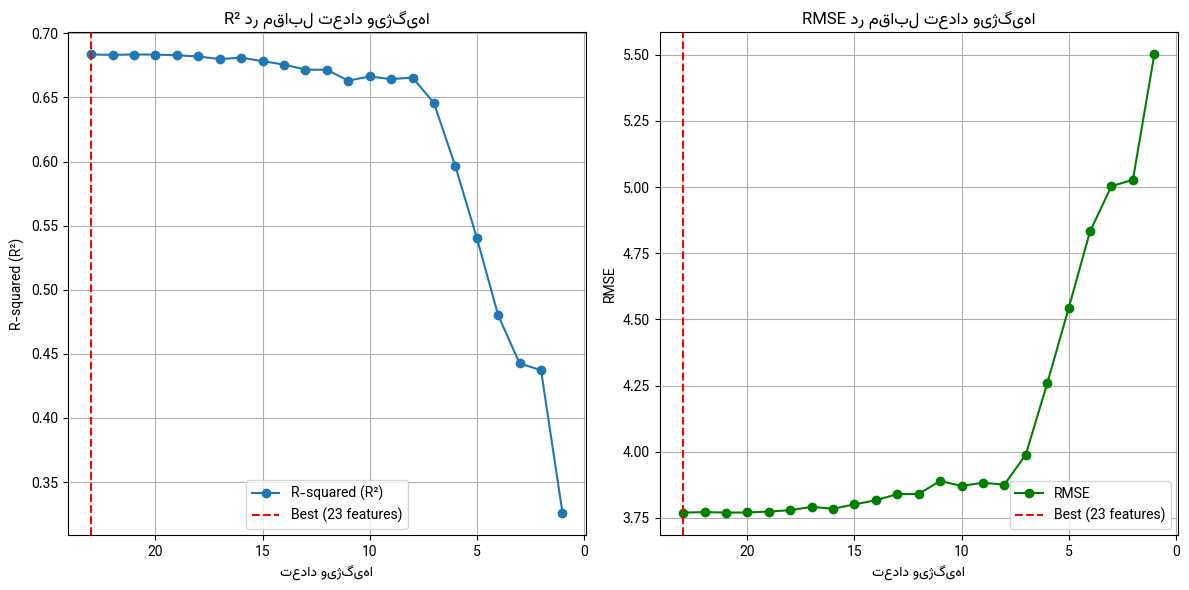


در حال آموزش مدل نهایی با بهترین ویژگی‌ها...

--- نتایج ارزیابی مدل نهایی (با بهترین ویژگی‌ها) ---
Mean Absolute Error (MAE): 2.6662
Root Mean Squared Error (RMSE): 3.6498
R-squared (R²): 0.7034 (توجه: ممکن است کمی با مقدار قبلی متفاوت باشد)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\4184044474.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_final, palette='viridis')


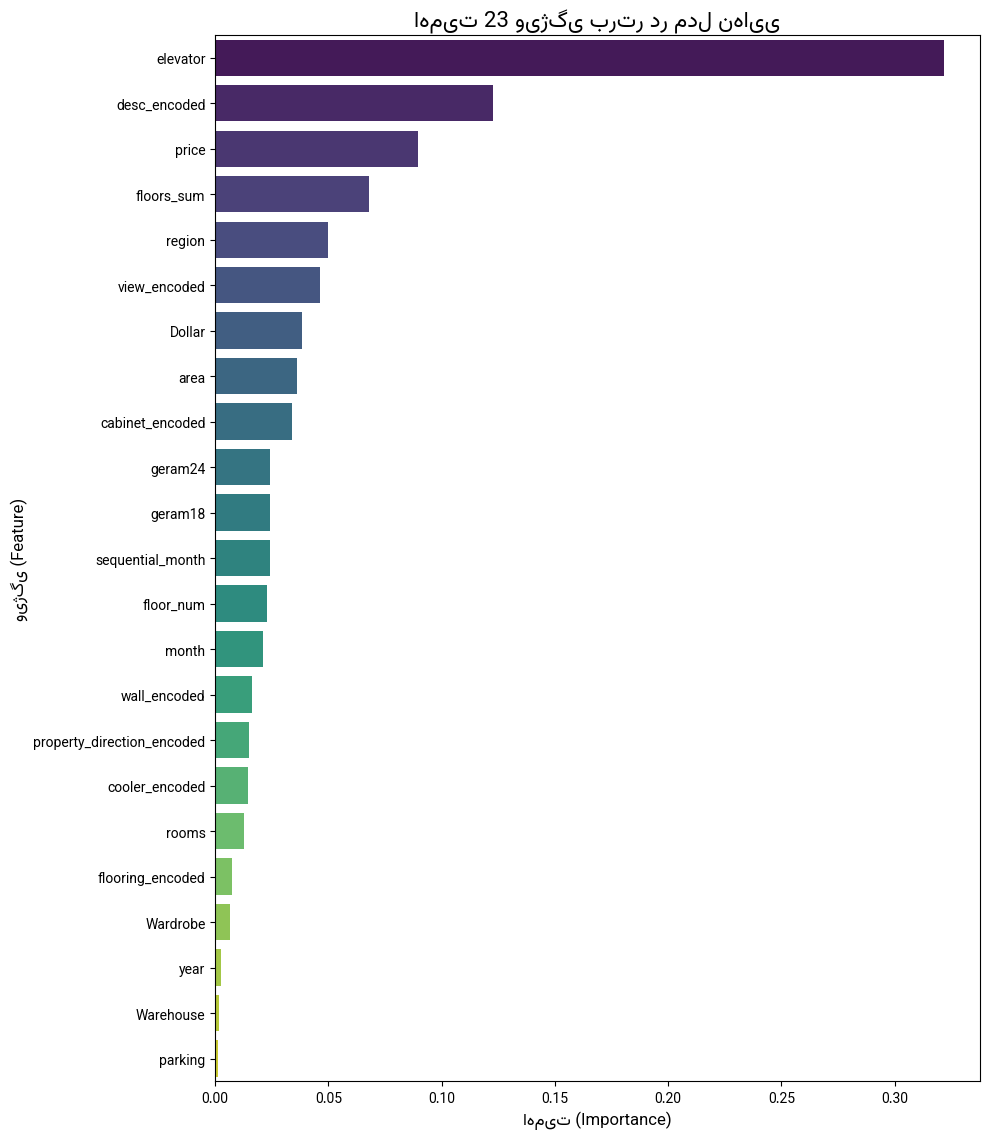

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import operator  # برای مرتب‌سازی

# --- 1. آماده‌سازی داده‌ها ---
# فرض می‌کنیم df شما بارگذاری شده و X و y مانند قبل تعریف شده‌اند.
# شما باید این بخش را با داده‌های واقعی خود جایگزین کنید.
try:
    X = df[['area', 'floors_sum', 'floor_num', 'rooms','elevator', 'parking','price','Dollar',
           'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe', 'month', 'year', 'sequential_month',
           'property_direction_encoded', 'view_encoded', 'flooring_encoded',
           'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded']]
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print("داده‌ها با موفقیت بارگذاری و تقسیم شدند.")
except NameError:
    print("دیتافریم 'df' یافت نشد. از داده‌های شبیه‌سازی شده استفاده می‌شود...")
    np.random.seed(42)
    data_sim = {f'feature_{i}': np.random.rand(500) * 100 for i in range(23)}
    data_sim['age'] = np.random.rand(500) * 30 + data_sim['feature_2'] * 0.1 - data_sim['feature_5'] * 0.05 + np.random.randn(500) * 5
    df = pd.DataFrame(data_sim)
    df['age'] = df['age'].clip(0, 40)
    X = df.drop('age', axis=1)
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print(f"تعداد کل ویژگی‌ها: {X_train.shape[1]}")
# ------------------------------------------------------------------------------------

# --- 2. مدل پایه ---
# می‌توانید تنظیمات را تغییر دهید.
rf_model = RandomForestRegressor(
    n_estimators=50,  # کمتر برای سرعت در حلقه
    max_depth=15,     # کمی عمق بیشتر
    random_state=42,
    n_jobs=-1
)

# --- 3. حلقه دستی RFE ---
print("\n--- شروع فرآیند حذف ویژگی دستی ---")

features_list = list(X_train.columns)
performance_history = []

while len(features_list) >= 1: # تا زمانی که حداقل ۱ ویژگی باقی بماند
    
    # داده‌های فعلی
    current_X_train = X_train[features_list]
    current_X_test = X_test[features_list]

    # آموزش مدل
    rf_model.fit(current_X_train, y_train)

    # ارزیابی
    y_pred = rf_model.predict(current_X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # ذخیره و چاپ نتایج
    num_features = len(features_list)
    performance_history.append({
        'num_features': num_features,
        'features': list(features_list), # کپی از لیست
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae
    })
    print(f"تعداد ویژگی‌ها: {num_features} | R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

    # اگر فقط یک ویژگی مانده، حلقه را بشکن
    if len(features_list) == 1:
        break

    # پیدا کردن ضعیف‌ترین ویژگی
    importances = rf_model.feature_importances_
    feature_importances = dict(zip(features_list, importances))
    worst_feature = min(feature_importances, key=feature_importances.get)

    # حذف ضعیف‌ترین ویژگی
    print(f"  > حذف ویژگی: {worst_feature}")
    features_list.remove(worst_feature)

print("\n--- فرآیند حذف ویژگی تمام شد ---")

# --- 4. انتخاب خودکار بهترین تعداد ویژگی ---
# ما اینجا بر اساس بیشترین R² انتخاب می‌کنیم.
# می‌توانید بر اساس کمترین RMSE یا روش‌های دیگر انتخاب کنید.
best_performance = max(performance_history, key=operator.itemgetter('R2'))

best_n_features = best_performance['num_features']
best_features_list = best_performance['features']
best_r2 = best_performance['R2']

print(f"\nبهترین عملکرد با {best_n_features} ویژگی به دست آمد (R² = {best_r2:.4f}).")
print("بهترین ویژگی‌ها:")
print(best_features_list)

# --- 5. رسم نمودار عملکرد ---
history_df = pd.DataFrame(performance_history)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_df['num_features'], history_df['R2'], marker='o', label='R-squared (R²)')
plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
plt.xlabel('تعداد ویژگی‌ها')
plt.ylabel('R-squared (R²)')
plt.title('R² در مقابل تعداد ویژگی‌ها')
plt.gca().invert_xaxis() # نمایش از زیاد به کم
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_df['num_features'], history_df['RMSE'], marker='o', color='g', label='RMSE')
plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
plt.xlabel('تعداد ویژگی‌ها')
plt.ylabel('RMSE')
plt.title('RMSE در مقابل تعداد ویژگی‌ها')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 6. آموزش و ارزیابی مدل نهایی با بهترین ویژگی‌ها ---
X_train_best = X_train[best_features_list]
X_test_best = X_test[best_features_list]

rf_final = RandomForestRegressor(
    n_estimators=200, # مدل نهایی قوی‌تر
    random_state=42,
    n_jobs=-1
)

print("\nدر حال آموزش مدل نهایی با بهترین ویژگی‌ها...")
rf_final.fit(X_train_best, y_train)

y_pred_final = rf_final.predict(X_test_best)
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print("\n--- نتایج ارزیابی مدل نهایی (با بهترین ویژگی‌ها) ---")
print(f"Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.4f}")
print(f"R-squared (R²): {r2_final:.4f} (توجه: ممکن است کمی با مقدار قبلی متفاوت باشد)")

# --- 7. رسم اهمیت ویژگی‌های نهایی ---
importances_final = rf_final.feature_importances_
feature_importance_df_final = pd.DataFrame({
    'Feature': best_features_list,
    'Importance': importances_final
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, max(6, len(best_features_list) * 0.5))) # تنظیم ارتفاع نمودار
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_final, palette='viridis')
plt.title(f'اهمیت {best_n_features} ویژگی برتر در مدل نهایی', fontsize=16)
plt.xlabel('اهمیت (Importance)', fontsize=12)
plt.ylabel('ویژگی (Feature)', fontsize=12)
plt.tight_layout()
plt.show()

Data loaded and split successfully.
Total number of features: 23

--- Starting Manual RFE Process with Decision Tree ---
Features: 23 | R²: 0.6322 | RMSE: 4.0642 | MAE: 3.0025
  > Removing feature: Warehouse
Features: 22 | R²: 0.6321 | RMSE: 4.0645 | MAE: 3.0018
  > Removing feature: year
Features: 21 | R²: 0.6321 | RMSE: 4.0644 | MAE: 3.0018
  > Removing feature: parking
Features: 20 | R²: 0.6322 | RMSE: 4.0639 | MAE: 3.0021
  > Removing feature: Wardrobe
Features: 19 | R²: 0.6330 | RMSE: 4.0596 | MAE: 2.9994
  > Removing feature: property_direction_encoded
Features: 18 | R²: 0.6335 | RMSE: 4.0569 | MAE: 2.9988
  > Removing feature: month
Features: 17 | R²: 0.6333 | RMSE: 4.0581 | MAE: 2.9995
  > Removing feature: area
Features: 16 | R²: 0.6338 | RMSE: 4.0551 | MAE: 2.9953
  > Removing feature: geram24
Features: 15 | R²: 0.6342 | RMSE: 4.0528 | MAE: 2.9940
  > Removing feature: floor_num
Features: 14 | R²: 0.6332 | RMSE: 4.0585 | MAE: 2.9963
  > Removing feature: geram18
Features: 13 

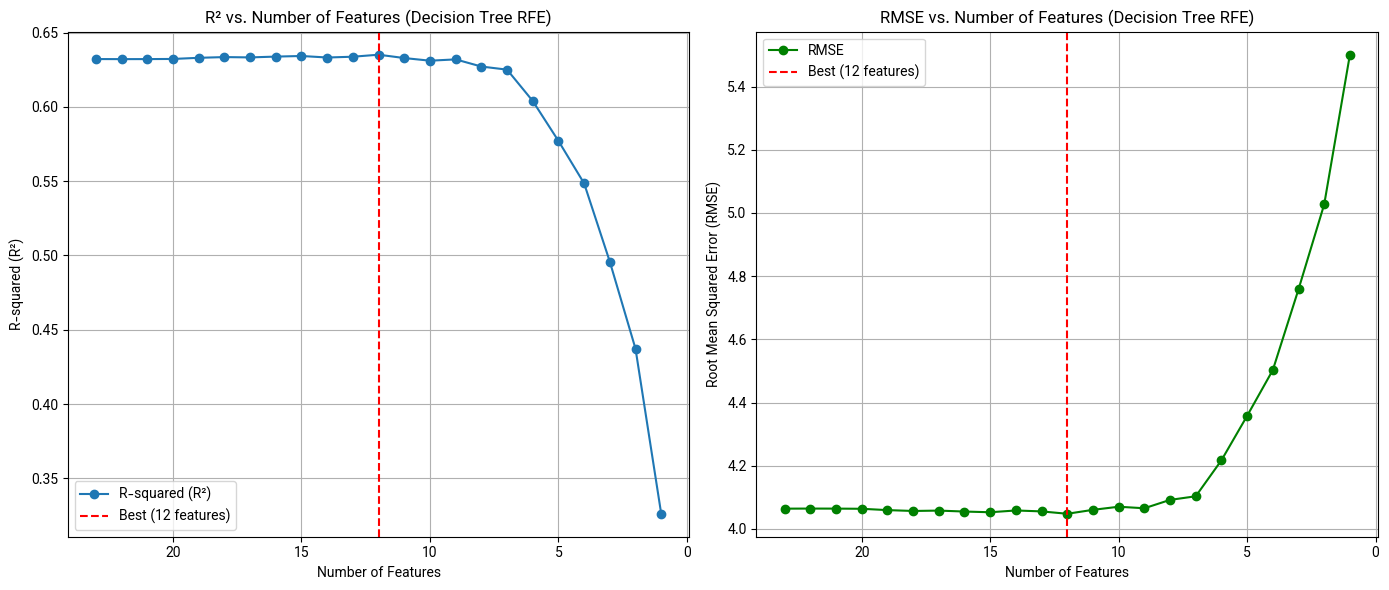


Training final *simple* Decision Tree model...

--- Final Simple Decision Tree Evaluation Results ---
Mean Absolute Error (MAE): 3.3956
Root Mean Squared Error (RMSE): 4.4773
R-squared (R²): 0.5536


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\3086884590.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_final_dt, palette='rocket')


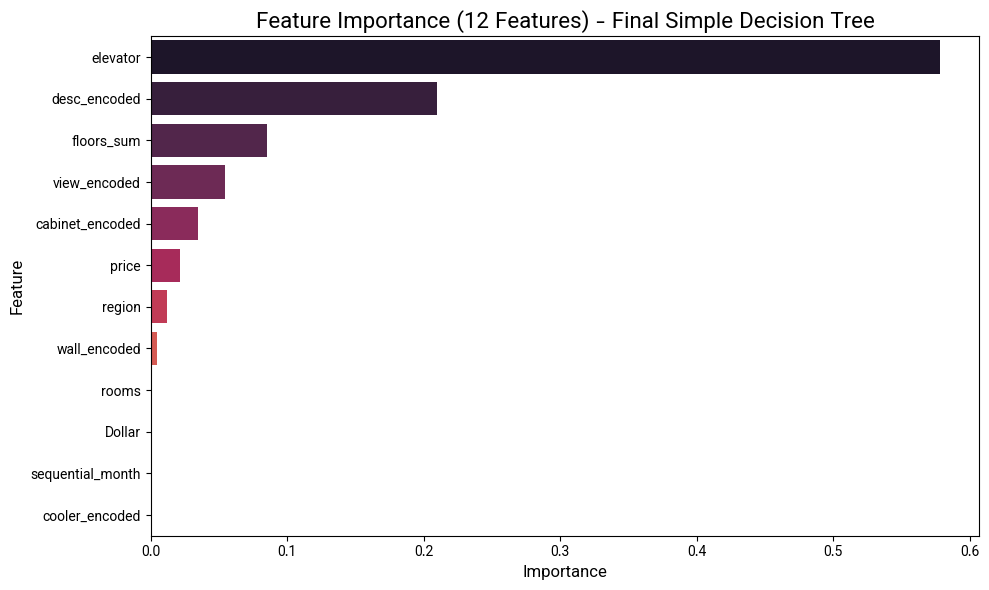


Plotting the Final Simple Decision Tree...


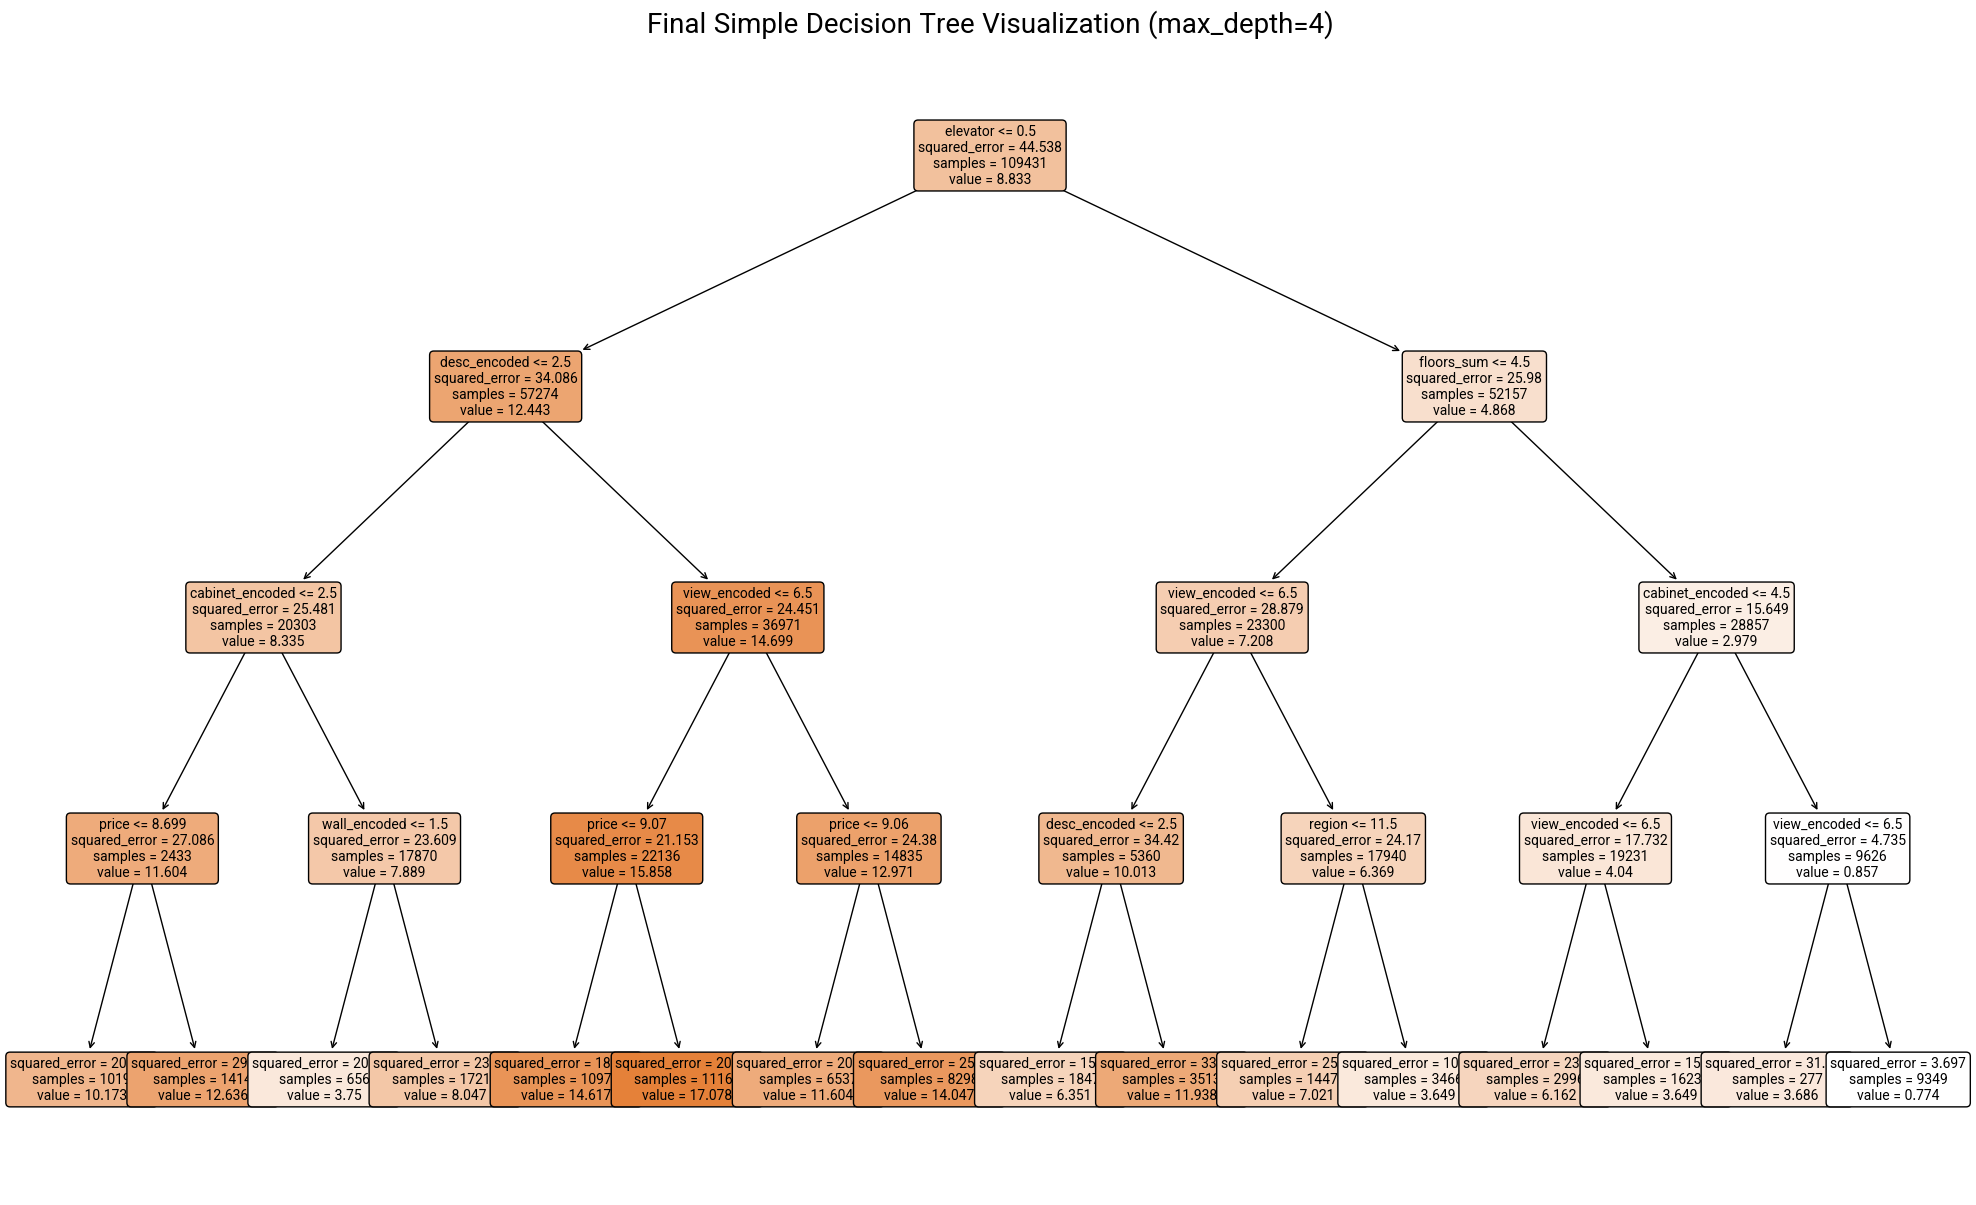

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree # Import DecisionTree and plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import operator

# --- 1. Prepare Data ---
# Attempt to use existing df, otherwise simulate data.
try:
    X = df[['area', 'floors_sum', 'floor_num', 'rooms','elevator', 'parking','price','Dollar',
           'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe', 'month', 'year', 'sequential_month',
           'property_direction_encoded', 'view_encoded', 'flooring_encoded',
           'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded']]
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print("Data loaded and split successfully.")
except NameError:
    print("DataFrame 'df' not found. Using simulated data...")
    np.random.seed(42)
    data_sim = {f'feature_{i}': np.random.rand(500) * 100 for i in range(23)}
    data_sim['age'] = np.random.rand(500) * 30 + data_sim['feature_2'] * 0.1 - data_sim['feature_5'] * 0.05 + np.random.randn(500) * 5
    df = pd.DataFrame(data_sim)
    df['age'] = df['age'].clip(0, 40)
    X = df.drop('age', axis=1)
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Total number of features: {X_train.shape[1]}")

# --- 2. Base Decision Tree Model (for RFE) ---
# Using a moderately deep tree for RFE
dt_rfe_base = DecisionTreeRegressor(
    max_depth=10,       # Moderate depth for RFE
    random_state=42
)

# --- 3. Manual RFE Loop with Decision Tree ---
print("\n--- Starting Manual RFE Process with Decision Tree ---")

features_list = list(X_train.columns)
performance_history = []

while len(features_list) >= 1:
    
    current_X_train = X_train[features_list]
    current_X_test = X_test[features_list]

    # Train model
    dt_rfe_base.fit(current_X_train, y_train)

    # Evaluate
    y_pred = dt_rfe_base.predict(current_X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store and print results
    num_features = len(features_list)
    performance_history.append({
        'num_features': num_features,
        'features': list(features_list),
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae
    })
    print(f"Features: {num_features} | R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

    if len(features_list) == 1:
        break

    # Find and remove the weakest feature
    importances = dt_rfe_base.feature_importances_
    feature_importances = dict(zip(features_list, importances))
    worst_feature = min(feature_importances, key=feature_importances.get)
    
    print(f"  > Removing feature: {worst_feature}")
    features_list.remove(worst_feature)

print("\n--- RFE Process Finished ---")

# --- 4. Select Best Number of Features ---
best_performance = max(performance_history, key=operator.itemgetter('R2'))
best_n_features = best_performance['num_features']
best_features_list = best_performance['features']
best_r2 = best_performance['R2']

print(f"\nBest performance achieved with {best_n_features} features (R² = {best_r2:.4f}).")
print("Best Features:")
print(best_features_list)

# --- 5. Plot Performance History ---
history_df = pd.DataFrame(performance_history)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_df['num_features'], history_df['R2'], marker='o', label='R-squared (R²)')
plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
plt.xlabel('Number of Features')
plt.ylabel('R-squared (R²)')
plt.title('R² vs. Number of Features (Decision Tree RFE)')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_df['num_features'], history_df['RMSE'], marker='o', color='g', label='RMSE')
plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
plt.xlabel('Number of Features')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. Number of Features (Decision Tree RFE)')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 6. Train and Evaluate *Final* Simple Decision Tree ---
X_train_best = X_train[best_features_list]
X_test_best = X_test[best_features_list]

# Using a simple tree for the final model (as requested before)
dt_final = DecisionTreeRegressor(
    max_depth=4,         # << Simple tree with low depth
    min_samples_leaf=10,
    random_state=42
)

print("\nTraining final *simple* Decision Tree model...")
dt_final.fit(X_train_best, y_train)

y_pred_final_dt = dt_final.predict(X_test_best)
mae_final_dt = mean_absolute_error(y_test, y_pred_final_dt)
rmse_final_dt = np.sqrt(mean_squared_error(y_test, y_pred_final_dt))
r2_final_dt = r2_score(y_test, y_pred_final_dt)

print("\n--- Final Simple Decision Tree Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae_final_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final_dt:.4f}")
print(f"R-squared (R²): {r2_final_dt:.4f}")

# --- 7. Plot Final Feature Importances ---
importances_final_dt = dt_final.feature_importances_
feature_importance_df_final_dt = pd.DataFrame({
    'Feature': best_features_list,
    'Importance': importances_final_dt
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, max(6, len(best_features_list) * 0.5)))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_final_dt, palette='rocket')
plt.title(f'Feature Importance ({best_n_features} Features) - Final Simple Decision Tree', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# --- 8. Plot the Final Simple Decision Tree ---
print("\nPlotting the Final Simple Decision Tree...")
plt.figure(figsize=(25, 15))

plot_tree(
    dt_final,
    feature_names=best_features_list,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title(f"Final Simple Decision Tree Visualization (max_depth={dt_final.max_depth})", fontsize=20)
plt.show()

Data loaded and split successfully.
Total number of features: 23

--- Starting Manual RFE Process with LightGBM ---
Features: 23 | R²: 0.6626 | RMSE: 3.8912 | MAE: 2.9186
  > Removing feature: area
Features: 22 | R²: 0.6618 | RMSE: 3.8956 | MAE: 2.9229
  > Removing feature: month
Features: 21 | R²: 0.6622 | RMSE: 3.8935 | MAE: 2.9208
  > Removing feature: Warehouse
Features: 20 | R²: 0.6617 | RMSE: 3.8963 | MAE: 2.9212
  > Removing feature: Wardrobe
Features: 19 | R²: 0.6622 | RMSE: 3.8936 | MAE: 2.9202
  > Removing feature: parking
Features: 18 | R²: 0.6622 | RMSE: 3.8934 | MAE: 2.9187
  > Removing feature: year
Features: 17 | R²: 0.6629 | RMSE: 3.8894 | MAE: 2.9140
  > Removing feature: geram24
Features: 16 | R²: 0.6624 | RMSE: 3.8925 | MAE: 2.9176
  > Removing feature: property_direction_encoded
Features: 15 | R²: 0.6624 | RMSE: 3.8924 | MAE: 2.9166
  > Removing feature: floor_num
Features: 14 | R²: 0.6617 | RMSE: 3.8961 | MAE: 2.9217
  > Removing feature: elevator
Features: 13 | R²

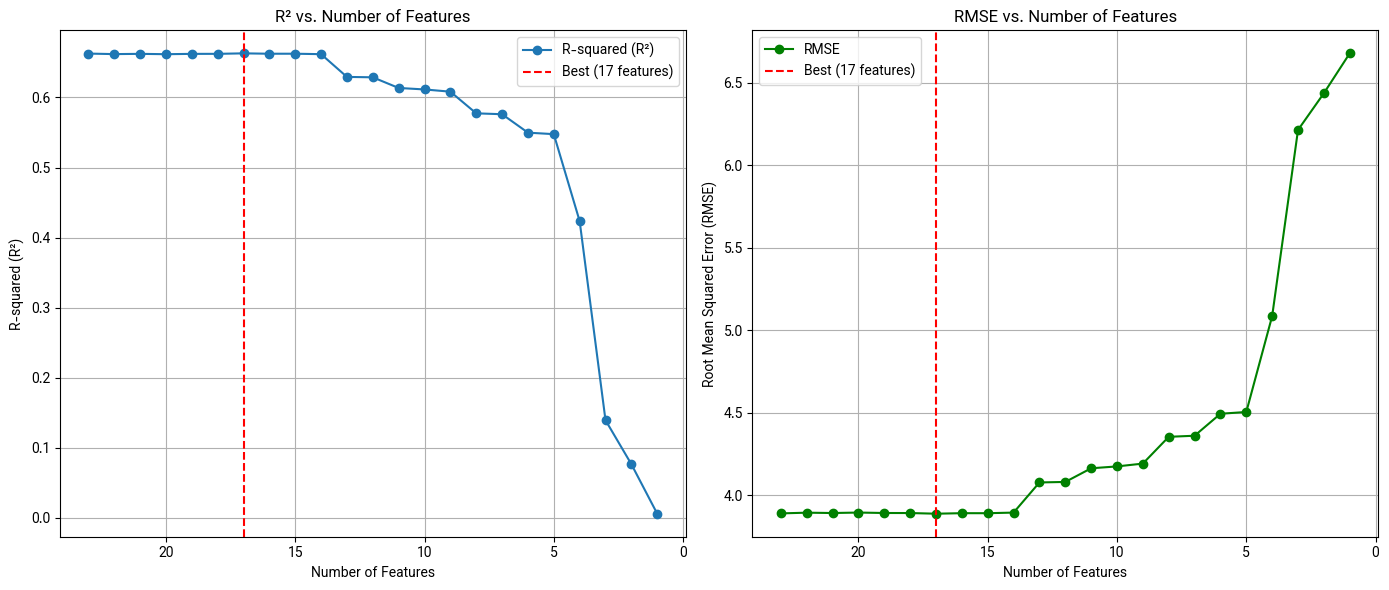


Training final LightGBM model with selected features...

--- Final Model Evaluation Results ---
Mean Absolute Error (MAE): 2.8477
Root Mean Squared Error (RMSE): 3.8148
R-squared (R²): 0.6757


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2616316369.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_final, palette='mako') # Changed palette


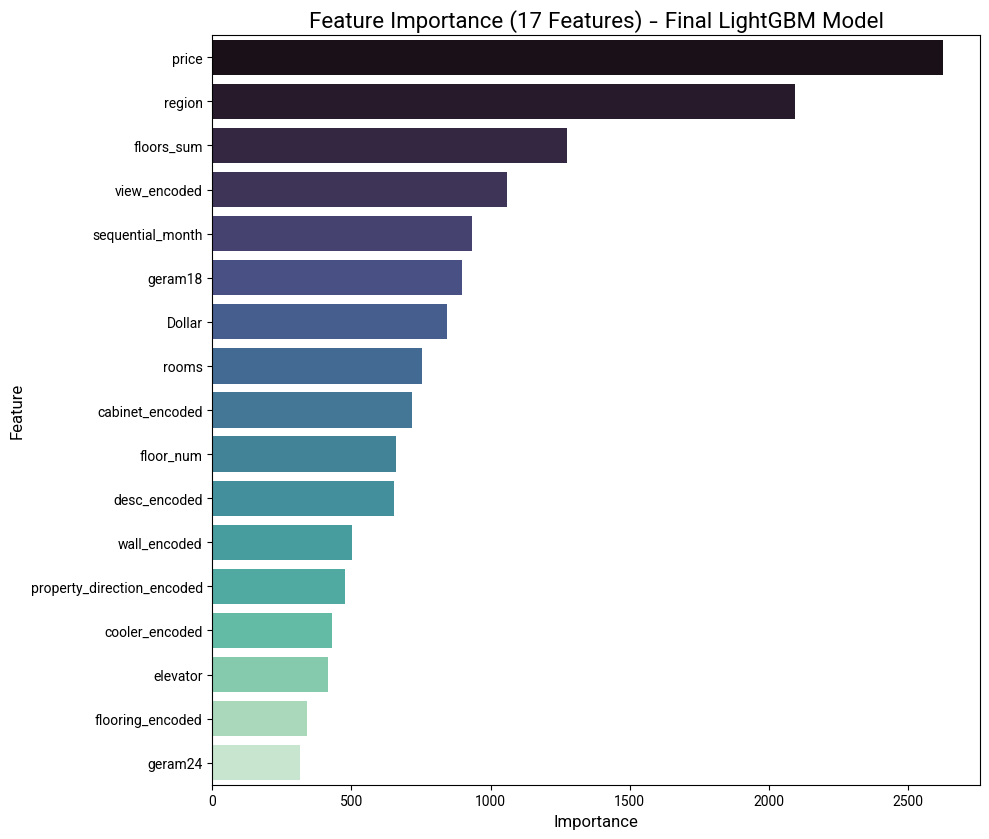

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb  # Import LightGBM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import operator

# --- 1. Prepare Data ---
# Attempt to use existing df, otherwise simulate data.
# Make sure your df is loaded and preprocessed (numerical, no NaNs).
try:
    X = df[['area', 'floors_sum', 'floor_num', 'rooms','elevator', 'parking','price','Dollar',
           'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe', 'month', 'year', 'sequential_month',
           'property_direction_encoded', 'view_encoded', 'flooring_encoded',
           'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded']]
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
    print("Data loaded and split successfully.")
except NameError:
    print("DataFrame 'df' not found. Using simulated data...")
    np.random.seed(42)
    data_sim = {f'feature_{i}': np.random.rand(500) * 100 for i in range(23)}
    data_sim['age'] = np.random.rand(500) * 30 + data_sim['feature_2'] * 0.1 - data_sim['feature_5'] * 0.05 + np.random.randn(500) * 5
    df = pd.DataFrame(data_sim)
    df['age'] = df['age'].clip(0, 40)
    X = df.drop('age', axis=1)
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Total number of features: {X_train.shape[1]}")

# --- 2. Base LGBM Model ---
lgbm_base = lgb.LGBMRegressor(
    n_estimators=100,      # Number of boosting rounds
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,          # No limit, but num_leaves controls complexity
    random_state=42,
    n_jobs=-1,
    colsample_bytree=0.8,  # Subsample columns
    subsample=0.8,         # Subsample rows
    verbose=-1             # Suppress verbose output
)

# --- 3. Manual RFE Loop ---
print("\n--- Starting Manual RFE Process with LightGBM ---")

features_list = list(X_train.columns)
performance_history = []

while len(features_list) >= 1:
    
    current_X_train = X_train[features_list]
    current_X_test = X_test[features_list]

    # Train model
    lgbm_base.fit(current_X_train, y_train)

    # Evaluate
    y_pred = lgbm_base.predict(current_X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store and print results
    num_features = len(features_list)
    performance_history.append({
        'num_features': num_features,
        'features': list(features_list),
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae
    })
    print(f"Features: {num_features} | R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

    if len(features_list) == 1:
        break

    # Find and remove the weakest feature
    importances = lgbm_base.feature_importances_
    feature_importances = dict(zip(features_list, importances))
    worst_feature = min(feature_importances, key=feature_importances.get)
    
    print(f"  > Removing feature: {worst_feature}")
    features_list.remove(worst_feature)

print("\n--- RFE Process Finished ---")

# --- 4. Select Best Number of Features ---
# Selecting based on the highest R² score.
best_performance = max(performance_history, key=operator.itemgetter('R2'))

best_n_features = best_performance['num_features']
best_features_list = best_performance['features']
best_r2 = best_performance['R2']

print(f"\nBest performance achieved with {best_n_features} features (R² = {best_r2:.4f}).")
print("Best Features:")
print(best_features_list)

# --- 5. Plot Performance History ---
history_df = pd.DataFrame(performance_history)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_df['num_features'], history_df['R2'], marker='o', label='R-squared (R²)')
plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
plt.xlabel('Number of Features')
plt.ylabel('R-squared (R²)')
plt.title('R² vs. Number of Features')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_df['num_features'], history_df['RMSE'], marker='o', color='g', label='RMSE')
plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
plt.xlabel('Number of Features')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. Number of Features')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 6. Train and Evaluate Final LGBM Model ---
X_train_best = X_train[best_features_list]
X_test_best = X_test[best_features_list]

# Using more estimators for the final model
lgbm_final = lgb.LGBMRegressor(
    n_estimators=500, # More estimators
    learning_rate=0.03,
    num_leaves=31,
    max_depth=-1,
    random_state=42,
    n_jobs=-1,
    colsample_bytree=0.8,
    subsample=0.8,
    verbose=-1
)

print("\nTraining final LightGBM model with selected features...")
lgbm_final.fit(X_train_best, y_train)

y_pred_final = lgbm_final.predict(X_test_best)
mae_final_lgbm = mean_absolute_error(y_test, y_pred_final)
rmse_final_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final_lgbm = r2_score(y_test, y_pred_final)

print("\n--- Final Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae_final_lgbm:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final_lgbm:.4f}")
print(f"R-squared (R²): {r2_final_lgbm:.4f}")

# --- 7. Plot Final Feature Importances ---
importances_final = lgbm_final.feature_importances_
feature_importance_df_final = pd.DataFrame({
    'Feature': best_features_list,
    'Importance': importances_final
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, max(6, len(best_features_list) * 0.5)))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_final, palette='mako') # Changed palette
plt.title(f'Feature Importance ({best_n_features} Features) - Final LightGBM Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

Data loaded and split successfully.
Total number of features before scaling: 23
Data scaled successfully.

--- Starting Manual RFE Process with LinearSVR ---
Features: 23 | R²: 0.5270 | RMSE: 4.6087 | MAE: 3.5359
  > Removing feature: property_direction_encoded
Features: 22 | R²: 0.5273 | RMSE: 4.6071 | MAE: 3.5363
  > Removing feature: area
Features: 21 | R²: 0.5268 | RMSE: 4.6099 | MAE: 3.5365
  > Removing feature: month
Features: 20 | R²: 0.5276 | RMSE: 4.6057 | MAE: 3.5366
  > Removing feature: Wardrobe
Features: 19 | R²: 0.5267 | RMSE: 4.6103 | MAE: 3.5367
  > Removing feature: sequential_month
Features: 18 | R²: 0.5266 | RMSE: 4.6109 | MAE: 3.5366
  > Removing feature: floor_num
Features: 17 | R²: 0.5271 | RMSE: 4.6082 | MAE: 3.5370
  > Removing feature: geram24
Features: 16 | R²: 0.5265 | RMSE: 4.6112 | MAE: 3.5368
  > Removing feature: Warehouse
Features: 15 | R²: 0.5269 | RMSE: 4.6090 | MAE: 3.5372
  > Removing feature: year
Features: 14 | R²: 0.5263 | RMSE: 4.6120 | MAE: 3.53

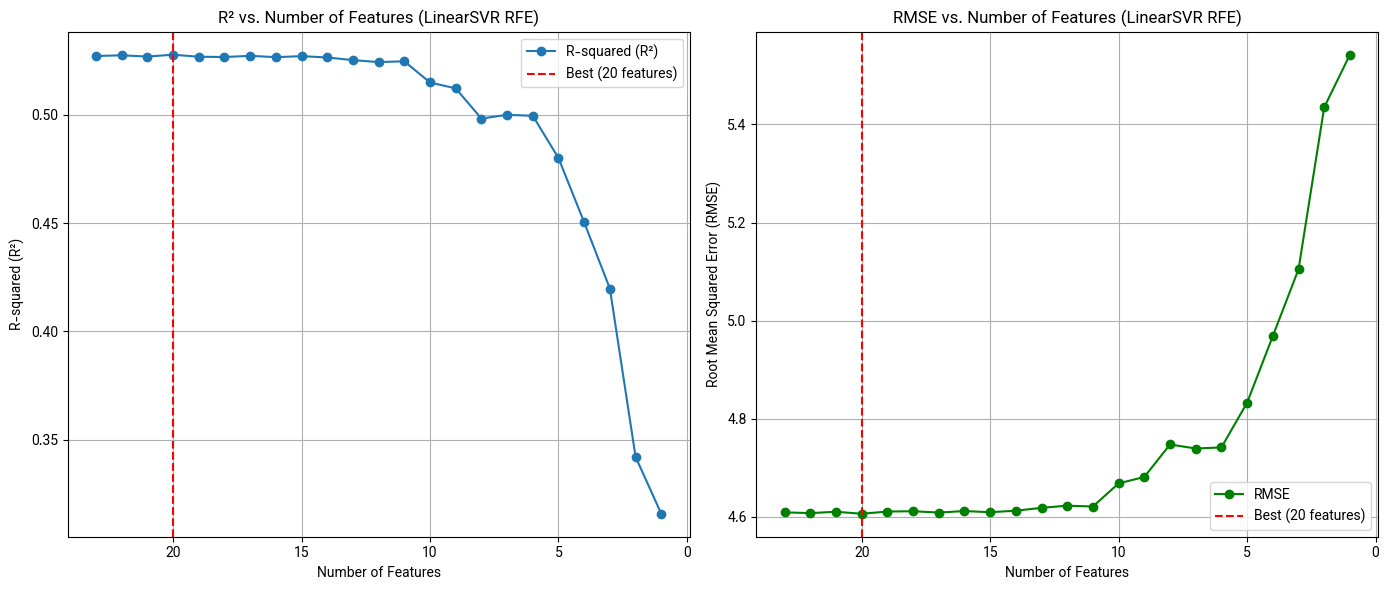


Training final LinearSVR model with selected features...

--- Final LinearSVR Model Evaluation Results ---
Mean Absolute Error (MAE): 3.5366
Root Mean Squared Error (RMSE): 4.6057
R-squared (R²): 0.5276


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2387885590.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df_final, palette='coolwarm')


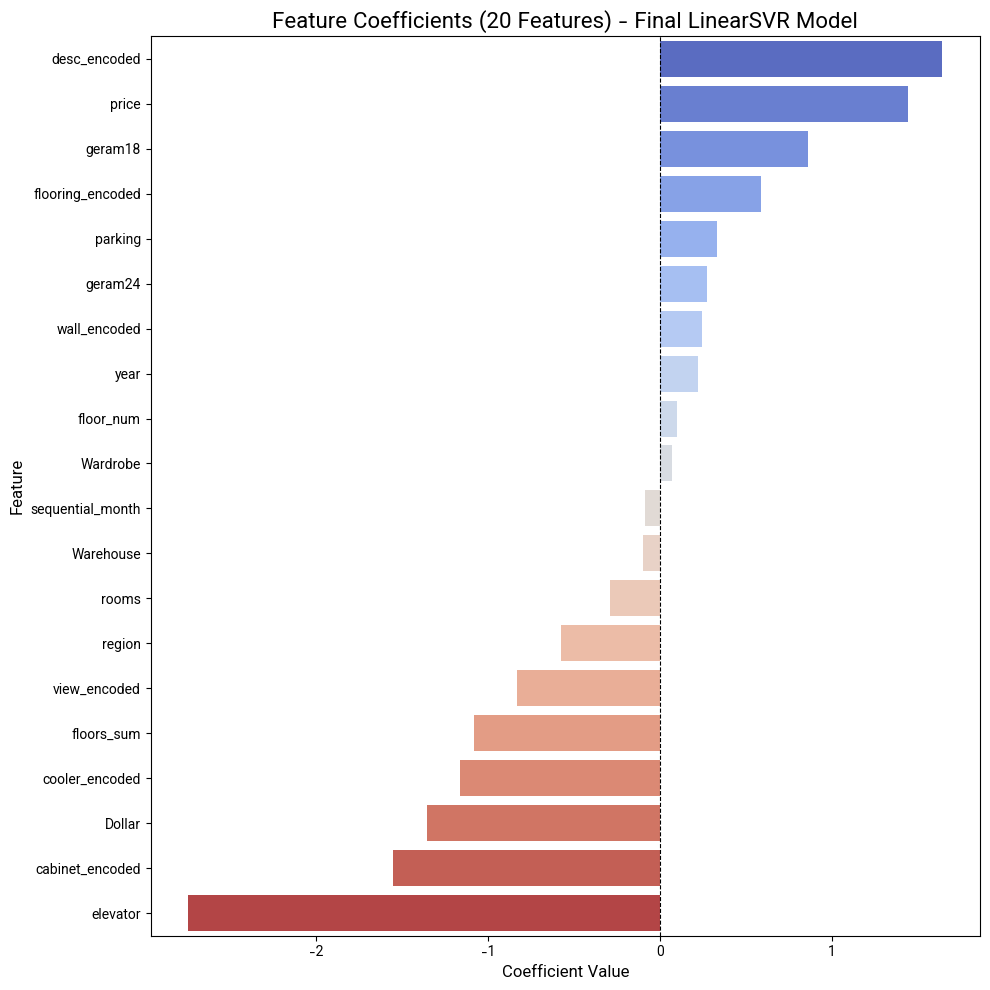

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR # Import Linear SVR
from sklearn.preprocessing import StandardScaler # Import Scaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import operator

# --- 1. Prepare Data ---
# Attempt to use existing df, otherwise simulate data.
try:
    X = df[['area', 'floors_sum', 'floor_num', 'rooms','elevator', 'parking','price','Dollar',
           'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe', 'month', 'year', 'sequential_month',
           'property_direction_encoded', 'view_encoded', 'flooring_encoded',
           'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded']]
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print("Data loaded and split successfully.")
    # Ensure all columns in X are numeric
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

except NameError:
    print("DataFrame 'df' not found. Using simulated data...")
    np.random.seed(42)
    data_sim = {f'feature_{i}': np.random.rand(500) * 100 for i in range(23)}
    data_sim['age'] = np.random.rand(500) * 30 + data_sim['feature_2'] * 0.1 - data_sim['feature_5'] * 0.05 + np.random.randn(500) * 5
    df = pd.DataFrame(data_sim)
    df['age'] = df['age'].clip(0, 40)
    X = df.drop('age', axis=1)
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Total number of features before scaling: {X_train.shape[1]}")

# --- 2. Scale Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("Data scaled successfully.")

# --- 3. Base LinearSVR Model (for RFE) ---
# Increased max_iter to avoid convergence warnings
svm_base = LinearSVR(
    random_state=42,
    max_iter=5000,
    dual=True # Often faster when n_samples > n_features
)

# --- 4. Manual RFE Loop with LinearSVR ---
print("\n--- Starting Manual RFE Process with LinearSVR ---")

features_list = list(X_train_scaled.columns)
performance_history = []

while len(features_list) >= 1:
    
    current_X_train = X_train_scaled[features_list]
    current_X_test = X_test_scaled[features_list]

    # Train model
    try:
        svm_base.fit(current_X_train, y_train)

        # Evaluate
        y_pred = svm_base.predict(current_X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store and print results
        num_features = len(features_list)
        performance_history.append({
            'num_features': num_features,
            'features': list(features_list),
            'R2': r2,
            'RMSE': rmse,
            'MAE': mae
        })
        print(f"Features: {num_features} | R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

        if len(features_list) == 1:
            break

        # Find and remove the weakest feature (smallest absolute coefficient)
        coefficients = svm_base.coef_
        feature_coefs = dict(zip(features_list, np.abs(coefficients)))
        worst_feature = min(feature_coefs, key=feature_coefs.get)
        
        print(f"  > Removing feature: {worst_feature}")
        features_list.remove(worst_feature)

    except Exception as e:
        print(f"An error occurred with {len(features_list)} features: {e}. Stopping RFE.")
        break


print("\n--- RFE Process Finished ---")

# --- 5. Select Best Number of Features ---
if performance_history:
    best_performance = max(performance_history, key=operator.itemgetter('R2'))
    best_n_features = best_performance['num_features']
    best_features_list = best_performance['features']
    best_r2 = best_performance['R2']

    print(f"\nBest performance achieved with {best_n_features} features (R² = {best_r2:.4f}).")
    print("Best Features:")
    print(best_features_list)

    # --- 6. Plot Performance History ---
    history_df = pd.DataFrame(performance_history)
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['num_features'], history_df['R2'], marker='o', label='R-squared (R²)')
    plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
    plt.xlabel('Number of Features')
    plt.ylabel('R-squared (R²)')
    plt.title('R² vs. Number of Features (LinearSVR RFE)')
    plt.gca().invert_xaxis()
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_df['num_features'], history_df['RMSE'], marker='o', color='g', label='RMSE')
    plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
    plt.xlabel('Number of Features')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.title('RMSE vs. Number of Features (LinearSVR RFE)')
    plt.gca().invert_xaxis()
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # --- 7. Train and Evaluate Final LinearSVR Model ---
    X_train_best = X_train_scaled[best_features_list]
    X_test_best = X_test_scaled[best_features_list]

    svm_final = LinearSVR(random_state=42, max_iter=10000, dual=True) # More iterations for final

    print("\nTraining final LinearSVR model with selected features...")
    svm_final.fit(X_train_best, y_train)

    y_pred_final_svm = svm_final.predict(X_test_best)
    mae_final_svm = mean_absolute_error(y_test, y_pred_final_svm)
    rmse_final_svm = np.sqrt(mean_squared_error(y_test, y_pred_final_svm))
    r2_final_svm = r2_score(y_test, y_pred_final_svm)

    print("\n--- Final LinearSVR Model Evaluation Results ---")
    print(f"Mean Absolute Error (MAE): {mae_final_svm:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_final_svm:.4f}")
    print(f"R-squared (R²): {r2_final_svm:.4f}")

    # --- 8. Plot Final Feature Importances (Coefficients) ---
    final_coefficients = svm_final.coef_
    feature_coef_df_final = pd.DataFrame({
        'Feature': best_features_list,
        'Coefficient': final_coefficients
    }).sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(10, max(6, len(best_features_list) * 0.5)))
    sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df_final, palette='coolwarm')
    plt.title(f'Feature Coefficients ({best_n_features} Features) - Final LinearSVR Model', fontsize=16)
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--') # Add a zero line
    plt.tight_layout()
    plt.show()

else:
    print("\nCould not complete RFE process.")

Data loaded and split successfully.
Total number of features before scaling: 23
Data scaled successfully.

--- Starting Manual RFE Process with LinearRegression ---
Features: 23 | R²: 0.5345 | RMSE: 4.5722 | MAE: 3.5727
  > Removing feature: sequential_month
Features: 22 | R²: 0.5345 | RMSE: 4.5722 | MAE: 3.5727
  > Removing feature: year
Features: 21 | R²: 0.5345 | RMSE: 4.5722 | MAE: 3.5727
  > Removing feature: area
Features: 20 | R²: 0.5345 | RMSE: 4.5722 | MAE: 3.5727
  > Removing feature: month
Features: 19 | R²: 0.5345 | RMSE: 4.5721 | MAE: 3.5727
  > Removing feature: floor_num
Features: 18 | R²: 0.5345 | RMSE: 4.5720 | MAE: 3.5728
  > Removing feature: property_direction_encoded
Features: 17 | R²: 0.5345 | RMSE: 4.5721 | MAE: 3.5727
  > Removing feature: Wardrobe
Features: 16 | R²: 0.5343 | RMSE: 4.5729 | MAE: 3.5730
  > Removing feature: Warehouse
Features: 15 | R²: 0.5341 | RMSE: 4.5739 | MAE: 3.5738
  > Removing feature: parking
Features: 14 | R²: 0.5335 | RMSE: 4.5769 | MA

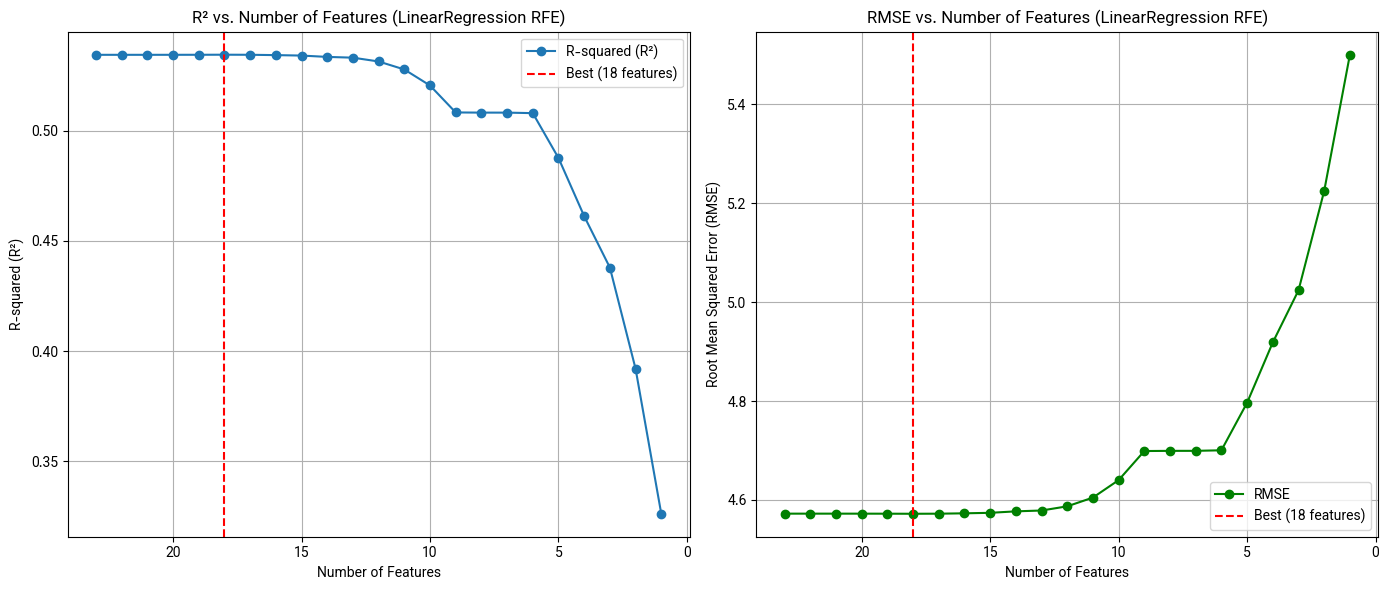


Training final LinearRegression model with selected features...

--- Final LinearRegression Model Evaluation Results ---
Mean Absolute Error (MAE): 3.5728
Root Mean Squared Error (RMSE): 4.5720
R-squared (R²): 0.5345


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\3111284791.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df_final_lr, palette='RdYlGn')


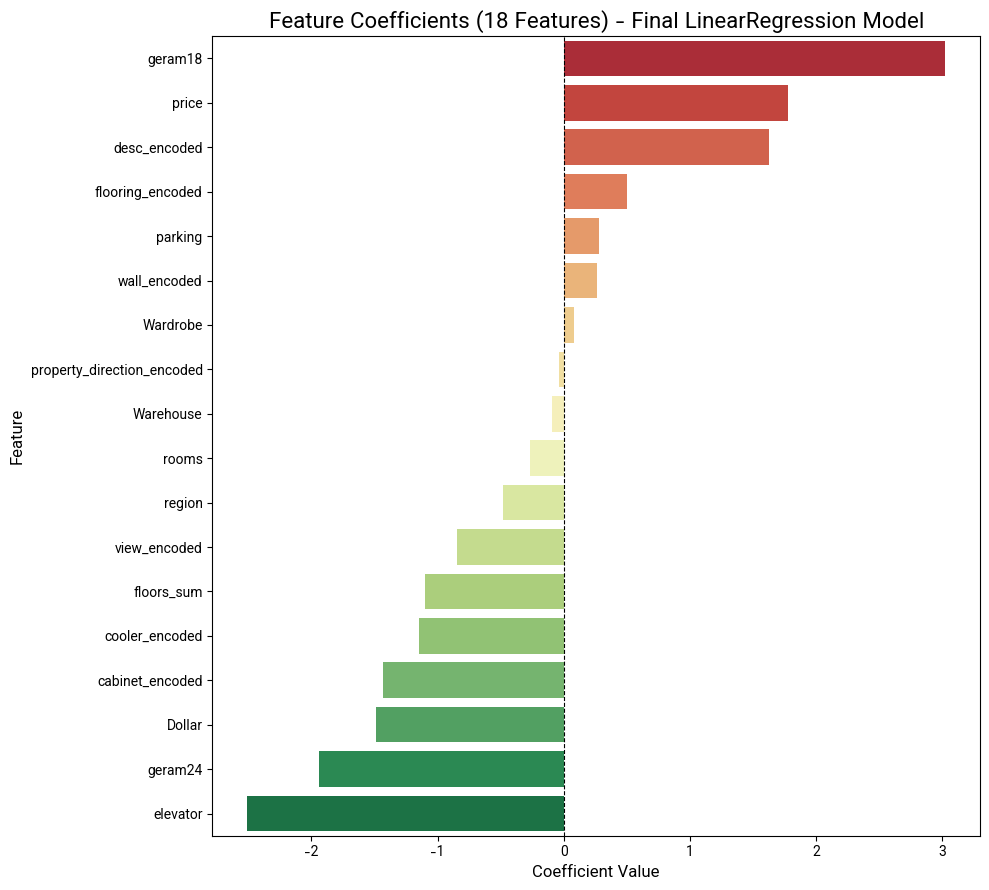

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Import Linear Regression
from sklearn.preprocessing import StandardScaler # Import Scaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import operator

# --- 1. Prepare Data ---
# Attempt to use existing df, otherwise simulate data.
try:
    X = df[['area', 'floors_sum', 'floor_num', 'rooms','elevator', 'parking','price','Dollar',
           'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe', 'month', 'year', 'sequential_month',
           'property_direction_encoded', 'view_encoded', 'flooring_encoded',
           'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded']]
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print("Data loaded and split successfully.")
    # Ensure all columns in X are numeric
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

except NameError:
    print("DataFrame 'df' not found. Using simulated data...")
    np.random.seed(42)
    data_sim = {f'feature_{i}': np.random.rand(500) * 100 for i in range(23)}
    data_sim['age'] = np.random.rand(500) * 30 + data_sim['feature_2'] * 0.1 - data_sim['feature_5'] * 0.05 + np.random.randn(500) * 5
    df = pd.DataFrame(data_sim)
    df['age'] = df['age'].clip(0, 40)
    X = df.drop('age', axis=1)
    y = df['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Total number of features before scaling: {X_train.shape[1]}")

# --- 2. Scale Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("Data scaled successfully.")

# --- 3. Base LinearRegression Model (for RFE) ---
lr_base = LinearRegression(n_jobs=-1)

# --- 4. Manual RFE Loop with LinearRegression ---
print("\n--- Starting Manual RFE Process with LinearRegression ---")

features_list = list(X_train_scaled.columns)
performance_history = []

while len(features_list) >= 1:
    
    current_X_train = X_train_scaled[features_list]
    current_X_test = X_test_scaled[features_list]

    # Train model
    try:
        lr_base.fit(current_X_train, y_train)

        # Evaluate
        y_pred = lr_base.predict(current_X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store and print results
        num_features = len(features_list)
        performance_history.append({
            'num_features': num_features,
            'features': list(features_list),
            'R2': r2,
            'RMSE': rmse,
            'MAE': mae
        })
        print(f"Features: {num_features} | R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

        if len(features_list) == 1:
            break

        # Find and remove the weakest feature (smallest absolute coefficient)
        coefficients = lr_base.coef_
        feature_coefs = dict(zip(features_list, np.abs(coefficients)))
        worst_feature = min(feature_coefs, key=feature_coefs.get)
        
        print(f"  > Removing feature: {worst_feature}")
        features_list.remove(worst_feature)

    except Exception as e:
        print(f"An error occurred with {len(features_list)} features: {e}. Stopping RFE.")
        break

print("\n--- RFE Process Finished ---")

# --- 5. Select Best Number of Features ---
if performance_history:
    best_performance = max(performance_history, key=operator.itemgetter('R2'))
    best_n_features = best_performance['num_features']
    best_features_list = best_performance['features']
    best_r2 = best_performance['R2']

    print(f"\nBest performance achieved with {best_n_features} features (R² = {best_r2:.4f}).")
    print("Best Features:")
    print(best_features_list)

    # --- 6. Plot Performance History ---
    history_df = pd.DataFrame(performance_history)
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['num_features'], history_df['R2'], marker='o', label='R-squared (R²)')
    plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
    plt.xlabel('Number of Features')
    plt.ylabel('R-squared (R²)')
    plt.title('R² vs. Number of Features (LinearRegression RFE)')
    plt.gca().invert_xaxis()
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_df['num_features'], history_df['RMSE'], marker='o', color='g', label='RMSE')
    plt.axvline(best_n_features, color='r', linestyle='--', label=f'Best ({best_n_features} features)')
    plt.xlabel('Number of Features')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.title('RMSE vs. Number of Features (LinearRegression RFE)')
    plt.gca().invert_xaxis()
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # --- 7. Train and Evaluate Final LinearRegression Model ---
    X_train_best = X_train_scaled[best_features_list]
    X_test_best = X_test_scaled[best_features_list]

    lr_final = LinearRegression(n_jobs=-1)

    print("\nTraining final LinearRegression model with selected features...")
    lr_final.fit(X_train_best, y_train)

    y_pred_final_lr = lr_final.predict(X_test_best)
    mae_final_lr = mean_absolute_error(y_test, y_pred_final_lr)
    rmse_final_lr = np.sqrt(mean_squared_error(y_test, y_pred_final_lr))
    r2_final_lr = r2_score(y_test, y_pred_final_lr)

    print("\n--- Final LinearRegression Model Evaluation Results ---")
    print(f"Mean Absolute Error (MAE): {mae_final_lr:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_final_lr:.4f}")
    print(f"R-squared (R²): {r2_final_lr:.4f}")

    # --- 8. Plot Final Feature Importances (Coefficients) ---
    final_coefficients_lr = lr_final.coef_
    feature_coef_df_final_lr = pd.DataFrame({
        'Feature': best_features_list,
        'Coefficient': final_coefficients_lr
    }).sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(10, max(6, len(best_features_list) * 0.5)))
    sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df_final_lr, palette='RdYlGn')
    plt.title(f'Feature Coefficients ({best_n_features} Features) - Final LinearRegression Model', fontsize=16)
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--') # Add a zero line
    plt.tight_layout()
    plt.show()

else:
    print("\nCould not complete RFE process.")

In [31]:
feature_coef_df_final

,Feature,Coefficient
19,desc_encoded,1.644879
5,price,1.447092
7,geram18,0.860449
15,flooring_encoded,0.587532
4,parking,0.332495
8,geram24,0.275953
16,wall_encoded,0.246862
12,year,0.221842
1,floor_num,0.097300
11,Wardrobe,0.071741



--- Plotting Model Performance Comparison ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2287159752.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=metrics_df.sort_values('R2', ascending=False), ax=axes[0], palette='Greens_r')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2287159752.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df.sort_values('MSE', ascending=True), ax=axes[1], palette='Reds_r')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21696\2287159752.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barpl

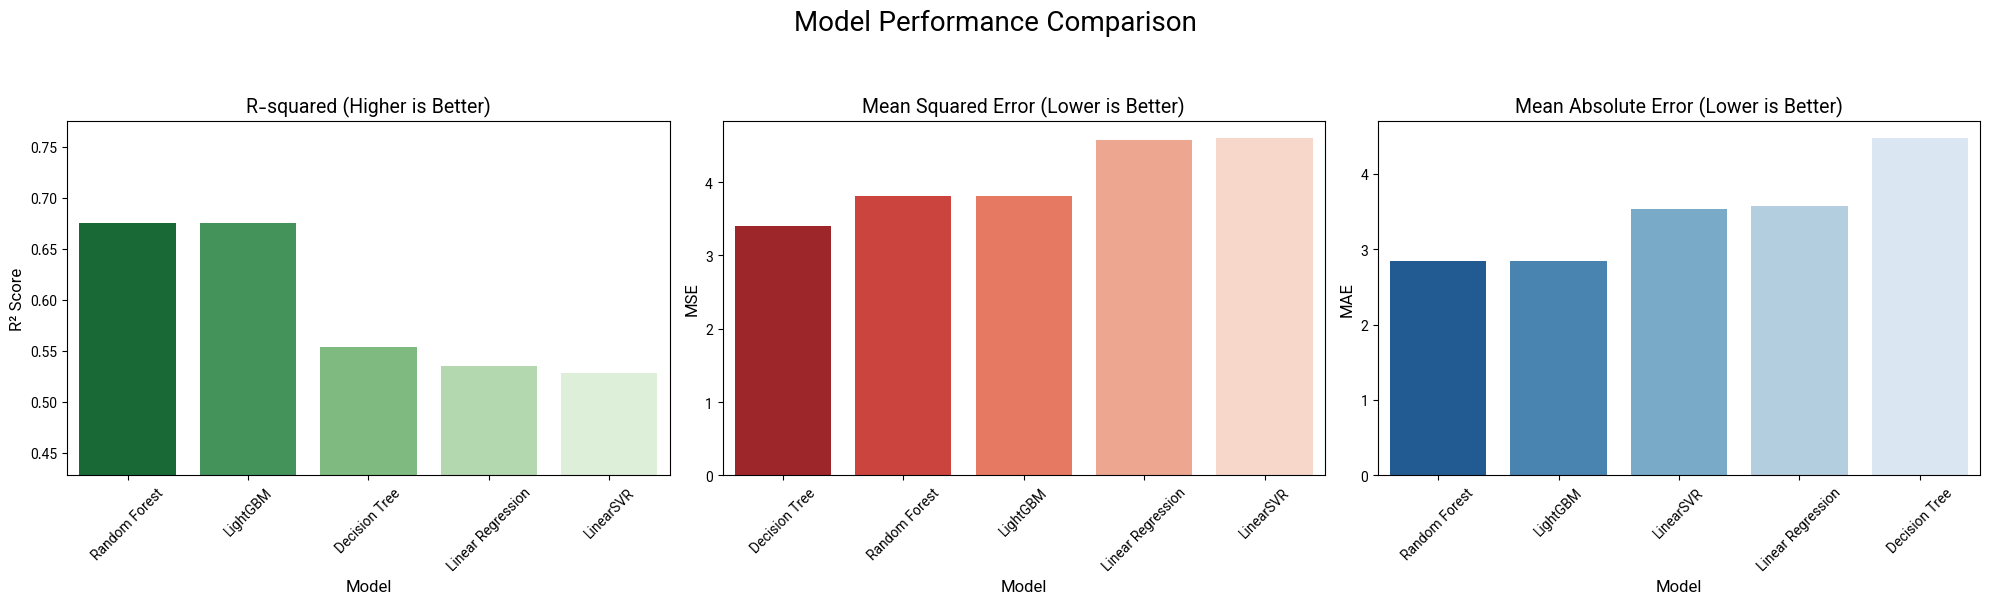

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- !! ★★★ بخش ورودی: مقادیر خود را اینجا وارد کنید ★★★ !! ---

metrics_data = {
    'Model': ['Random Forest', 'Decision Tree', 'LightGBM', 'LinearSVR', 'Linear Regression'],
    
    # مقادیر R-squared نهایی هر مدل را وارد کنید
    'R2': [r2_final, r2_final_dt, r2_final_lgbm, r2_final_svm, r2_final_lr], 
    
    # مقادیر MSE نهایی هر مدل را وارد کنید
    'MSE': [rmse_final, mae_final_dt, rmse_final_lgbm, rmse_final_svm, rmse_final_lr], 
    
    # مقادیر MAE نهایی هر مدل را وارد کنید
    'MAE': [mae_final, rmse_final_dt, mae_final_lgbm, mae_final_svm, mae_final_lr]     
}

top_features_data = {
    # لیست ۶ ویژگی برتر هر مدل را وارد کنید
    'Random Forest':   ['elevator', 'year', 'view_encoded', 'desc_encoded', 'area', 'price'],
    'Decision Tree':   ['elevator', 'desc_encoded', 'floor_sum', 'view_encoded', 'price', 'region'],
    'LightGBM':        ['elevator', 'year', 'desc_encoded', 'view_encoded', 'price', 'area'],
    'LinearSVR':       ['elevator', 'year', 'parking', 'area', 'rooms', 'Dollar'],
    'Linear Regression': ['elevator', 'year', 'area', 'parking', 'rooms', 'geram18']
}
# --- !! ★★★ پایان بخش ورودی ★★★ !! ---


# --- 1. تبدیل داده‌ها به DataFrame ---
metrics_df = pd.DataFrame(metrics_data)
top_features_df = pd.DataFrame(top_features_data)

# اطمینان از اینکه جدول ویژگی‌ها ۶ ردیف دارد
if len(top_features_df) < 6:
     # Add None rows if less than 6 features were provided
     for i in range(len(top_features_df), 6):
         top_features_df.loc[i] = [None] * len(top_features_df.columns)
         
top_features_df.index = [f'Rank {i+1}' for i in range(6)] # Add ranks


# --- 2. رسم نمودارهای مقایسه عملکرد ---
print("\n--- Plotting Model Performance Comparison ---")
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # 1 row, 3 columns
fig.suptitle('Model Performance Comparison', fontsize=20, y=1.03)

# Plot R-squared (Higher is better)
sns.barplot(x='Model', y='R2', data=metrics_df.sort_values('R2', ascending=False), ax=axes[0], palette='Greens_r')
axes[0].set_title('R-squared (Higher is Better)', fontsize=14)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(bottom=max(0, metrics_df['R2'].min() - 0.1), top=min(1.0, metrics_df['R2'].max() + 0.1))

# Plot MSE (Lower is better)
sns.barplot(x='Model', y='MSE', data=metrics_df.sort_values('MSE', ascending=True), ax=axes[1], palette='Reds_r')
axes[1].set_title('Root Mean Squared Error', fontsize=14)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Plot MAE (Lower is better)
sns.barplot(x='Model', y='MAE', data=metrics_df.sort_values('MAE', ascending=True), ax=axes[2], palette='Blues_r')
axes[2].set_title('Mean Absolute Error', fontsize=14)
axes[2].set_xlabel('Model', fontsize=12)
axes[2].set_ylabel('MAE', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout
plt.show()



In [ ]:
mae_final_dt = mean_absolute_error(y_test, y_pred_final_dt)
rmse_final_dt = np.sqrt(mean_squared_error(y_test, y_pred_final_dt))
r2_final_dt